# Music Tagging

Sources: 
- Variables definition: [LibROSA](https://librosa.org/)
- Notebook: [Music Features Analysis & Genre Classification](https://www.kaggle.com/code/zjohnson87/music-features-analysis-genre-classification)
- Lab Course: [Short-Time Fourier Transform and Chroma Features](https://www.audiolabs-erlangen.de/content/05-fau/professor/00-mueller/02-teaching/2016s_apl/LabCourse_STFT.pdf)
- Blog Post: [The Mel Scale, Mel Spectrograms, and Mel Frequency Cepstral Coefficients](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8)

## Import Libraries and Data

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

In [51]:
df = pd.read_csv('data/data.csv')
print("Num rows: ", len(df))
df.head()

Num rows:  1000


filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   
3        1361.045467         1567.804596  2739.625101            0.069124   
4        1811.076084         2052.332563  3927.809582            0.075480   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   
1 -233.860772  ...  -2.250578   3.959198  5.322555  0.812028 -1.107202   
2 -221.802549  ... -13.037723 -12.652228 -1.821905 -7.260097 -6.660252   
3 -207.208080  ...  -0.613248   0.384877  2.605128 -5.188924 -9.527455   
4 -145.434568  ...   7.457218 -10.470444 -2.360483 -6.783623  2.671134   

      mfcc17     mfcc18     mfcc19     mfcc20  label  
0  -6.829571   0.965922  -7.570825   2.918987  blues  
1  -4.556555  -2.436490   3.316913  -0.608485  blues  
2 -14.682694 -11.719264 -11.025216 -13.387260  blues  
3  -9.244394  -2.848274  -1.418707  -5.932607  blues  
4  -4.760879  -0.949005   0.024832  -2.005315  blues  

[5 rows x 30 columns]

In [52]:
df_2genre = pd.read_csv('data/data_2genre.csv')
print("Num rows: ", len(df_2genre))
df_2genre.head()

Num rows:  200


filename       tempo  beats  chroma_stft      rmse  spectral_centroid  \
0  pop.00024.au  117.453835     57     0.410990  0.207584        3301.781785   
1  pop.00099.au   78.302557     38     0.360462  0.138195        2765.747194   
2  pop.00009.au  107.666016     50     0.454810  0.159711        3279.877315   
3  pop.00078.au  103.359375     52     0.454698  0.223419        3124.176350   
4  pop.00037.au  103.359375     51     0.451668  0.240985        3236.413205   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  ...  \
0         3175.656592  7302.597509            0.144527  -40.802069  ...   
1         3222.713605  6873.391771            0.096015 -119.320605  ...   
2         3026.391118  6953.099622            0.172819  -35.277026  ...   
3         2970.320532  6618.134981            0.142721  -42.757179  ...   
4         2953.596262  6698.776160            0.164825    4.821123  ...   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0 -0.568772  0.552448 -1.981371  1.915755  0.076505 -1.270496  1.233082   
1  1.566938 -2.932391 -1.609138 -0.200545 -2.429376  1.207988  5.848729   
2 -0.518891  0.212918 -1.294660 -0.105626 -1.245879 -2.528455  0.571032   
3  3.020176 -1.242321 -3.524069 -0.325165 -1.443294 -1.864617 -0.031307   
4  1.753352  3.336132  2.352307  1.428845 -0.604926 -2.185691 -1.602394   

     mfcc19    mfcc20  label  
0  1.493700  0.949931      1  
1  1.609469  7.580263      1  
2  1.569434 -1.724873      1  
3 -0.729631 -0.987611      1  
4 -0.612146 -4.050126      1  

[5 rows x 30 columns]

Let'see the types of variables and if we have any NAs:

In [53]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

## Feature Analysis

Analyze the data to extract information aboout the different types of genres of music. We can see there are 10 genres:

In [54]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

In [55]:
genres = df['label'].unique()
genres

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

First, we notice the label from each file is different, and it seems that df_2genre has the corresponding "pop" label as 1, and "classical" as 2. Let's concatenate them and see if there're any repeated filenames.

In [56]:
print("Unique values df:", df['label'].unique())
print("Unique values df_2genre:", df_2genre['label'].unique())

Unique values df: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Unique values df_2genre: [1 2]


In [57]:
genres_df_2genre = []
for filename in df_2genre['filename'].values:
    if filename.split('.')[0] not in genres_df_2genre:
        genres_df_2genre.append(filename.split('.')[0])
print(genres_df_2genre)

['pop', 'classical']


Replace the label numbers for string labels:

In [58]:
df_2genre['label'] = df_2genre['label'].replace(to_replace={1: 'pop', 2: 'classical'})

In [59]:
df_all = pd.concat([df, df_2genre])
df_all['filename'].value_counts()

classical.00048.au    2
pop.00036.au          2
pop.00078.au          2
pop.00009.au          2
pop.00099.au          2
                     ..
hiphop.00020.au       1
hiphop.00080.au       1
hiphop.00011.au       1
hiphop.00042.au       1
rock.00066.au         1
Name: filename, Length: 1000, dtype: int64

We can see that *df_2genre* is already part of df, so let's work solely with df.

In [60]:
df_all.duplicated().value_counts()

False    1000
True      200
dtype: int64

## EDA (Exploratory Data Analysis)

Next, we'll review the different variables, show its definition to understand what they represent, and analyse the main values. But first, let's define some basic functions:

In [61]:
def plot_distribution(column_name):
    plt.figure(figsize=(30, 10))
    for genre in genres:
        sns.kdeplot(data=df.loc[df['label'] == genre, column_name], label=genre)

    plt.title("Probability Density Curve of {} (by genre)".format(column_name), fontsize=20)
    plt.xlabel(column_name, fontsize=20)
    plt.ylabel("density", fontsize=20)
    plt.tick_params(labelsize=16)
    plt.legend(fontsize=18)
    plt.plot()

In [62]:
def plot_mean(column_name):
    variable = [ df[df['label'] == genre][column_name].mean() for genre in genres ]

    plt.figure(figsize=(30, 10))
    sns.barplot(x=genres, y=variable, palette="deep")
    plt.title("Mean {} (by genre)".format(column_name), fontsize=20)
    plt.xlabel("Genre", fontsize=20)
    plt.ylabel("Mean {}".format(column_name), fontsize=20)
    plt.tick_params(labelsize=16)
    plt.plot()

### tempo 

Tempo is how fast or slow a piece of music is performed. Tempo generally is measured as the number of beats per minute, where the beat is the basic measure of time in music.

#### tempo distribution

First, let's plot the continuous probability density curve through the kernel density estimate (KDE) plot.

Most genres have a normal distribution with peaks around 100 BPM. However, "disco" have a peak closer to 150 BPM; and "reggae" has two peaks, around 80 BPM and 150 BPM. Furthermore, "classical" and "blues" and "country" have a wider sread of tempos.

TODO: print a a graph to see the deviation (not sure how it's called, but it's in the WindPro project). I think it's sort of a boxplot...

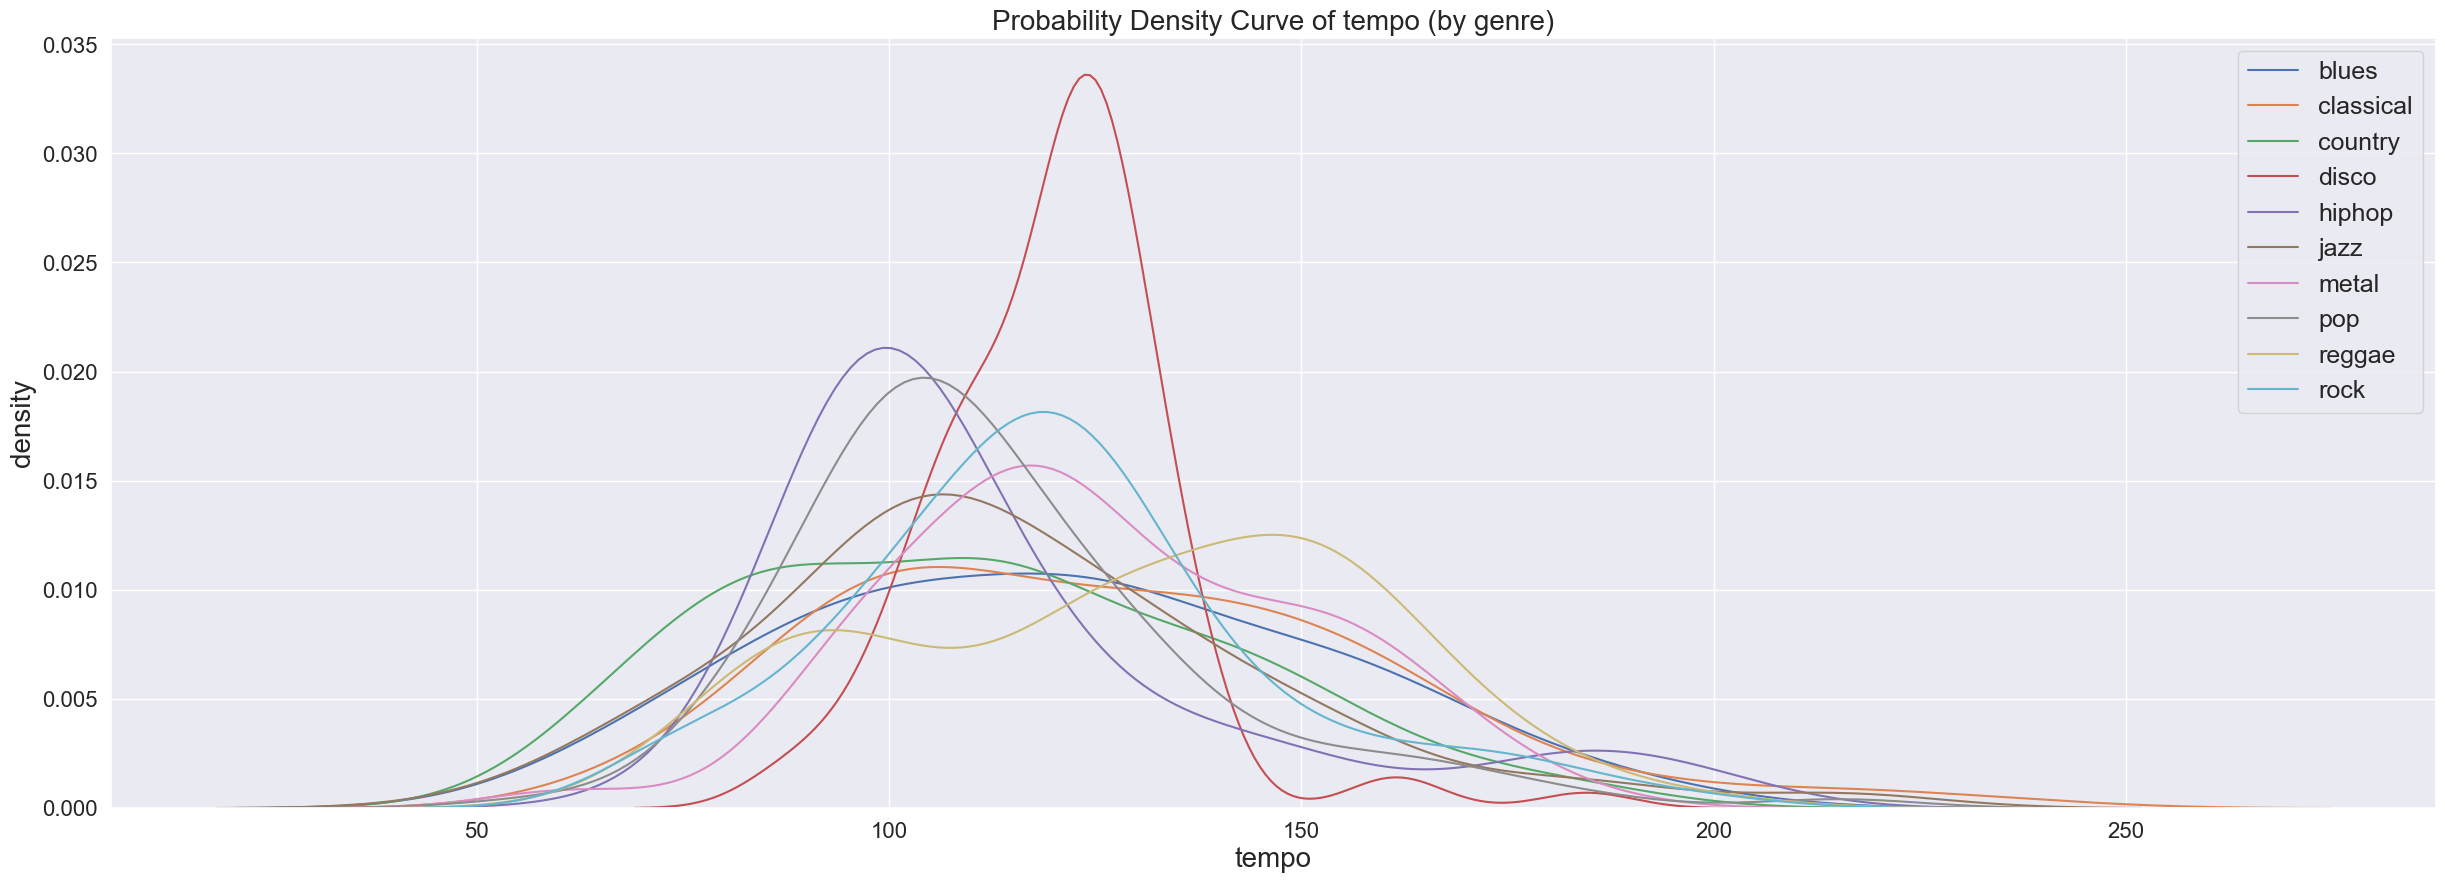

In [63]:
plot_distribution('tempo')

#### tempo mean

We can also review the mean of each genre and see that they are very similar.

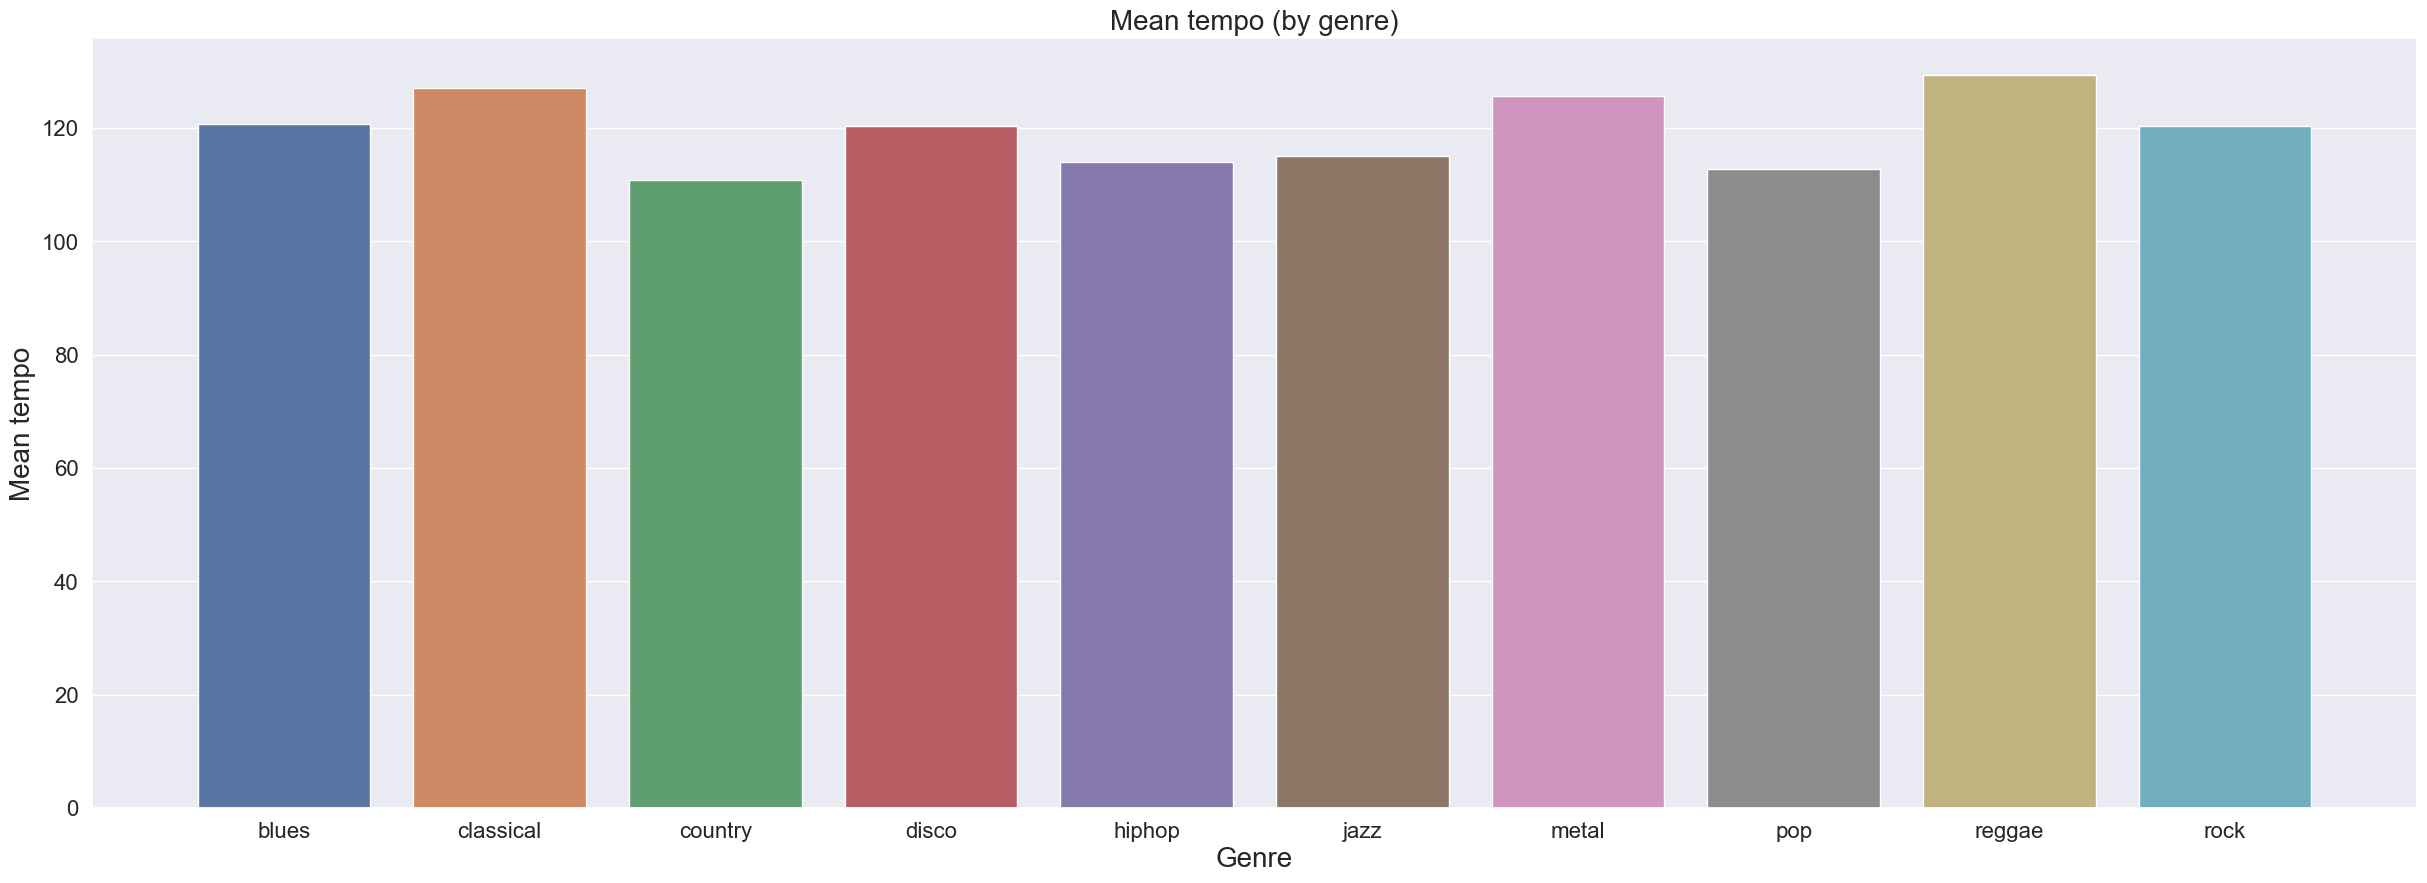

In [64]:
plot_mean('tempo')

### beats

Beat is a rythmic unit in music, which is used to measure the tempo of the song. In this case, there's no explanation on the meaning of this value, as it differs from the tempo distribution. While there seems to be a direct correlation between tempo and beat, where **beat = tempo / 2 - 3.3**, there's no further details, therefore I'm going to ignore it for now. We might need to remove it in the future due to the high correlation.

In [65]:
df[['tempo', 'beats']].head(10)

tempo  beats
0  103.359375     50
1   95.703125     44
2  151.999081     75
3  184.570312     91
4  161.499023     74
5  107.666016     51
6  161.499023     80
7  151.999081     74
8   92.285156     45
9  151.999081     70

### chroma_stft
The Fourier transform, which is used to convert a time-dependent signal to a
frequency-dependent signal. Applying the Fourier transform to local sections
of an audio signal, one obtains the short-time Fourier transform (STFT).

The Fourier transform maps a time-dependent signal to a frequency-dependent function which reveals the spectrum of frequency components that compose the original signal. the STFT is a compromise between a time- and a frequency-based representation by determining the sinusoidal frequency and phase content of local sections of a signal as it changes over time. Usually, the STFT is computed using a Discrete Fourir Transform (DFT), which can be computed using the fast Fourier transform (FFT).  The discrete STFT yields a discrete set of Fourier coefficients that are indexed by time and frequency parameters. The correct physical interpretation of these parameters in terms of units such as seconds and Hertz depends on the sampling rate, the window size, and the hop size used in the STFT computation.

The human perception of pitch is periodic in the sense that two pitches are perceived as similar in “color” (playing a similar harmonic role) if they differ by one or several octaves (where, in our scale, an octave is defined as the distance of 12 pitches). For example, the pitches p = 60 and p = 72 are one octave apart, and the pitches p = 57 and p = 71 are two octaves apart. A pitch can be separated into two components, which are referred to as tone height and chroma. The tone height refers to the octave number and the chroma to the respective pitch spelling attribute. In Western music notation, the 12 pitch attributes are given by the set {C, C#, D, . . . , B}. Enumerating the chroma values, we identify this set with [0 : 11] where c = 0 refers to chroma C, c = 1 to C], and so on. A pitch class is defined as the set of all pitches that share the same chroma. For example, the pitch class that corresponds to the chroma c = 0 (C) consists of the set {0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120} (which are the musical notes {. . . , C0, C1, C2, C3 . . .}).

Since no explanation is provided for this feature, we assume the value is a representation of the chromagram vaue for each song. We can therefore showcase the distribution and mean value per genre:

#### chroma_stft distribution

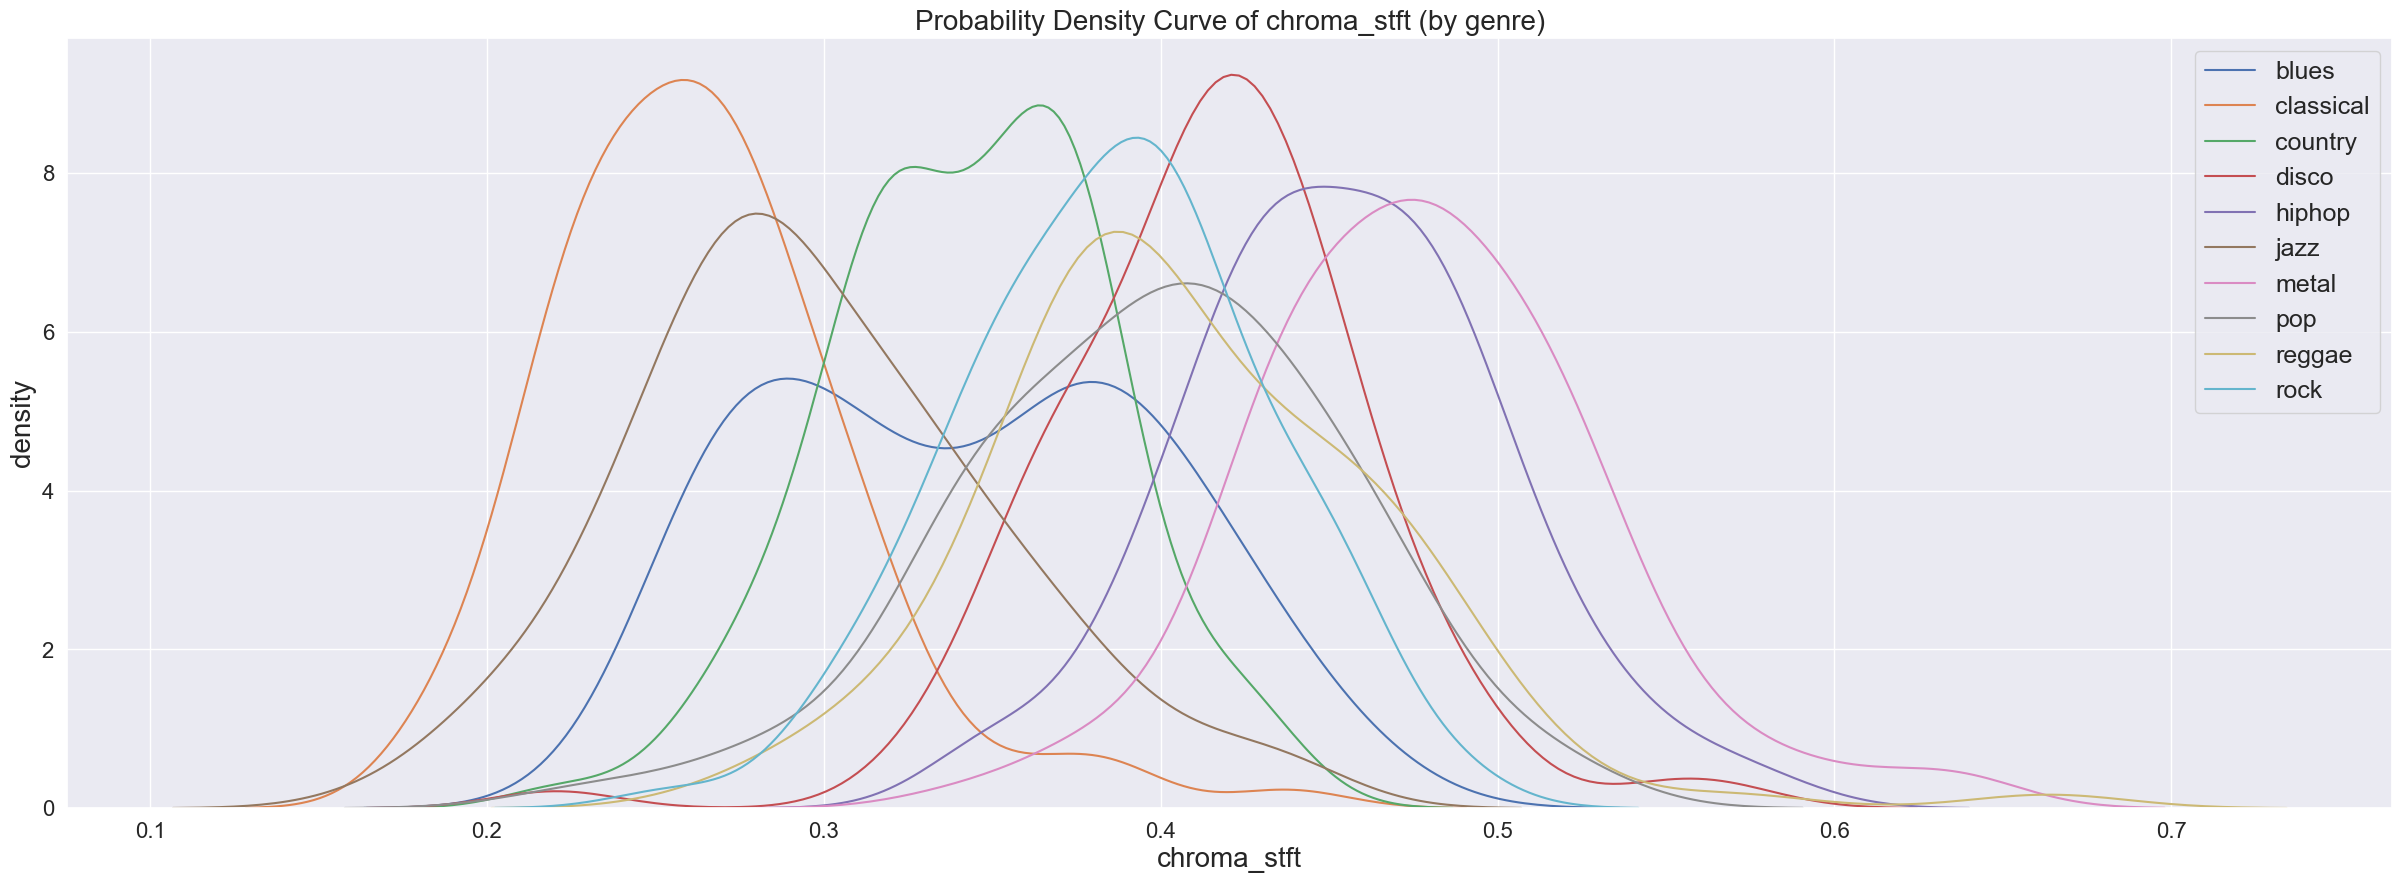

In [66]:
plot_distribution('chroma_stft')

#### chroma_stft mean

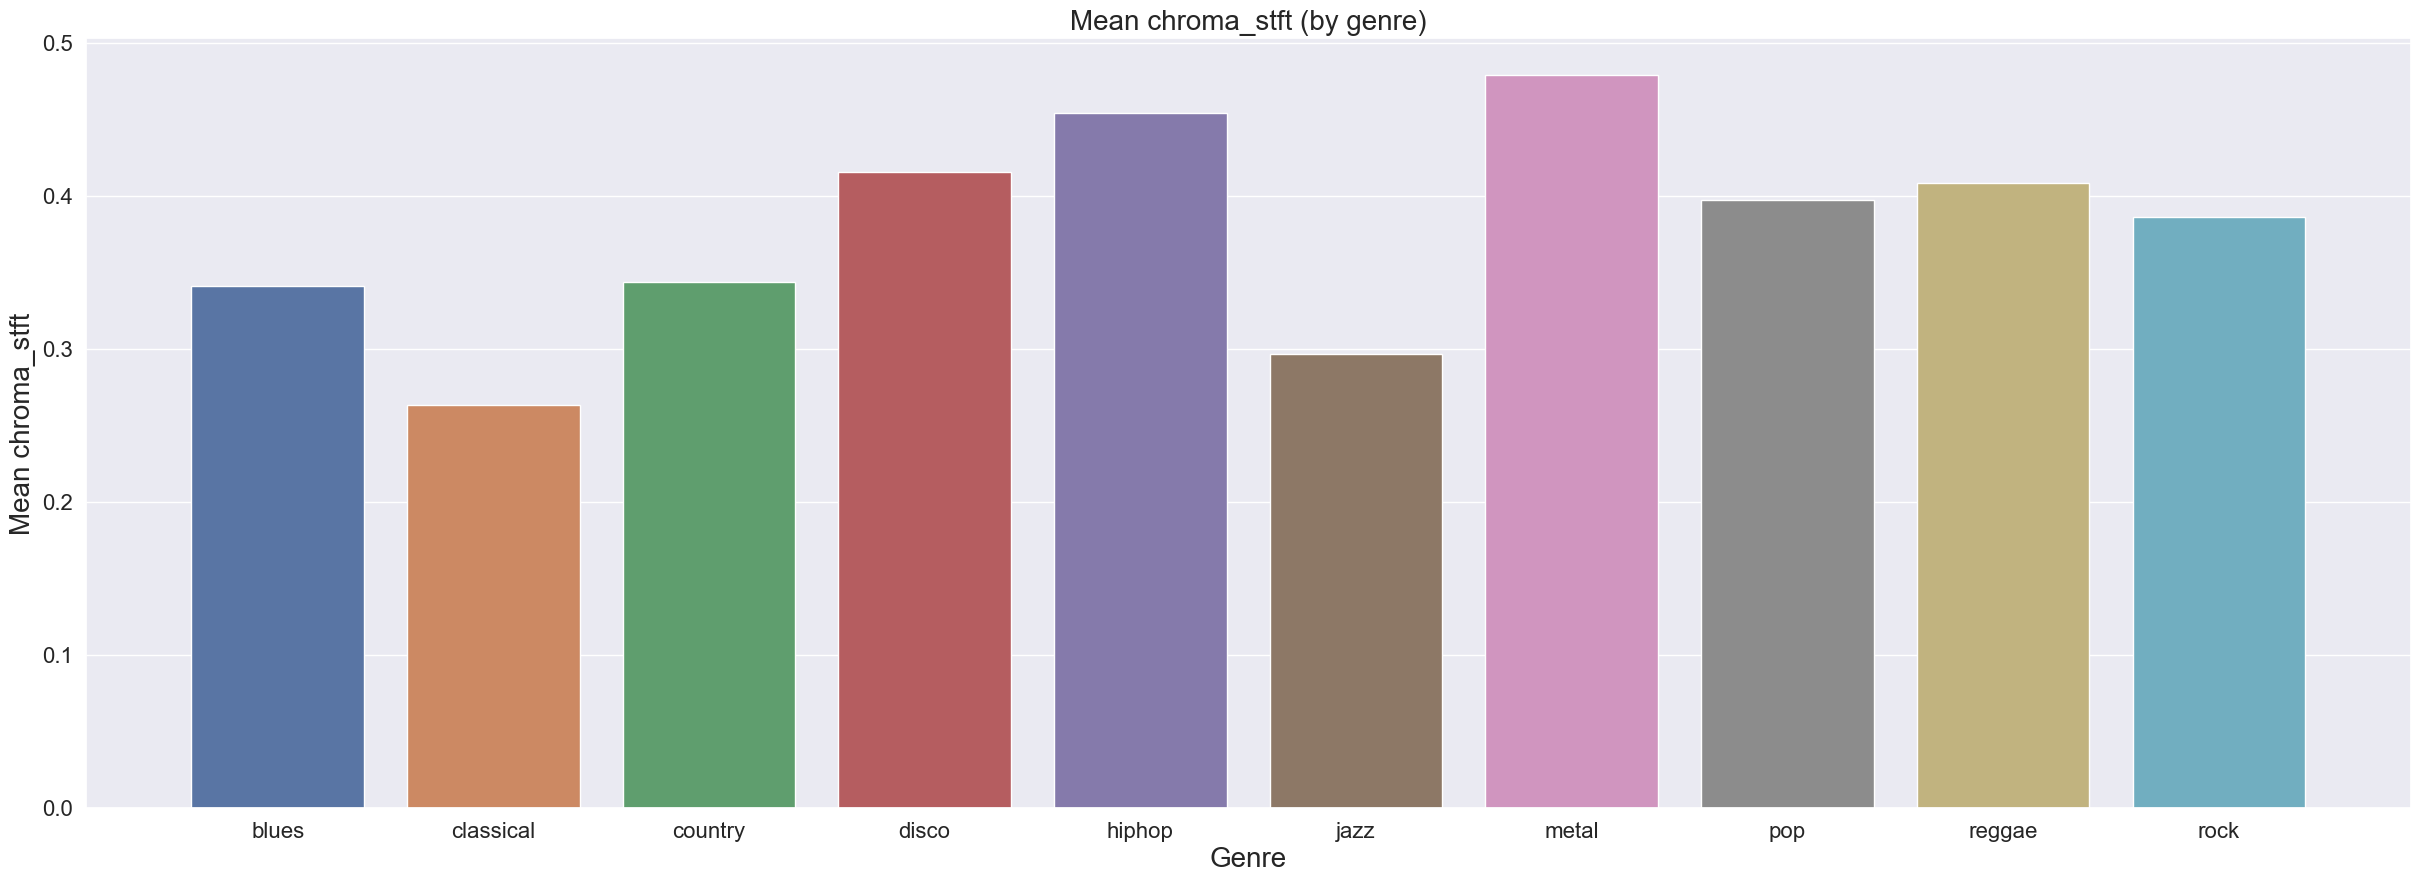

In [67]:
plot_mean('chroma_stft')

### rmse

Root Mean Square (RMS) Energy is the energy for each frame, either from the audio samples *y* or from a spectrogram *S*; which corresponds to the total magntiude of the signal. For audio signals, that roughly corresponds to how loud the signal is.

#### rmse distribution

From the distribution plot we can see how 'classical' music has very low variance and energy.

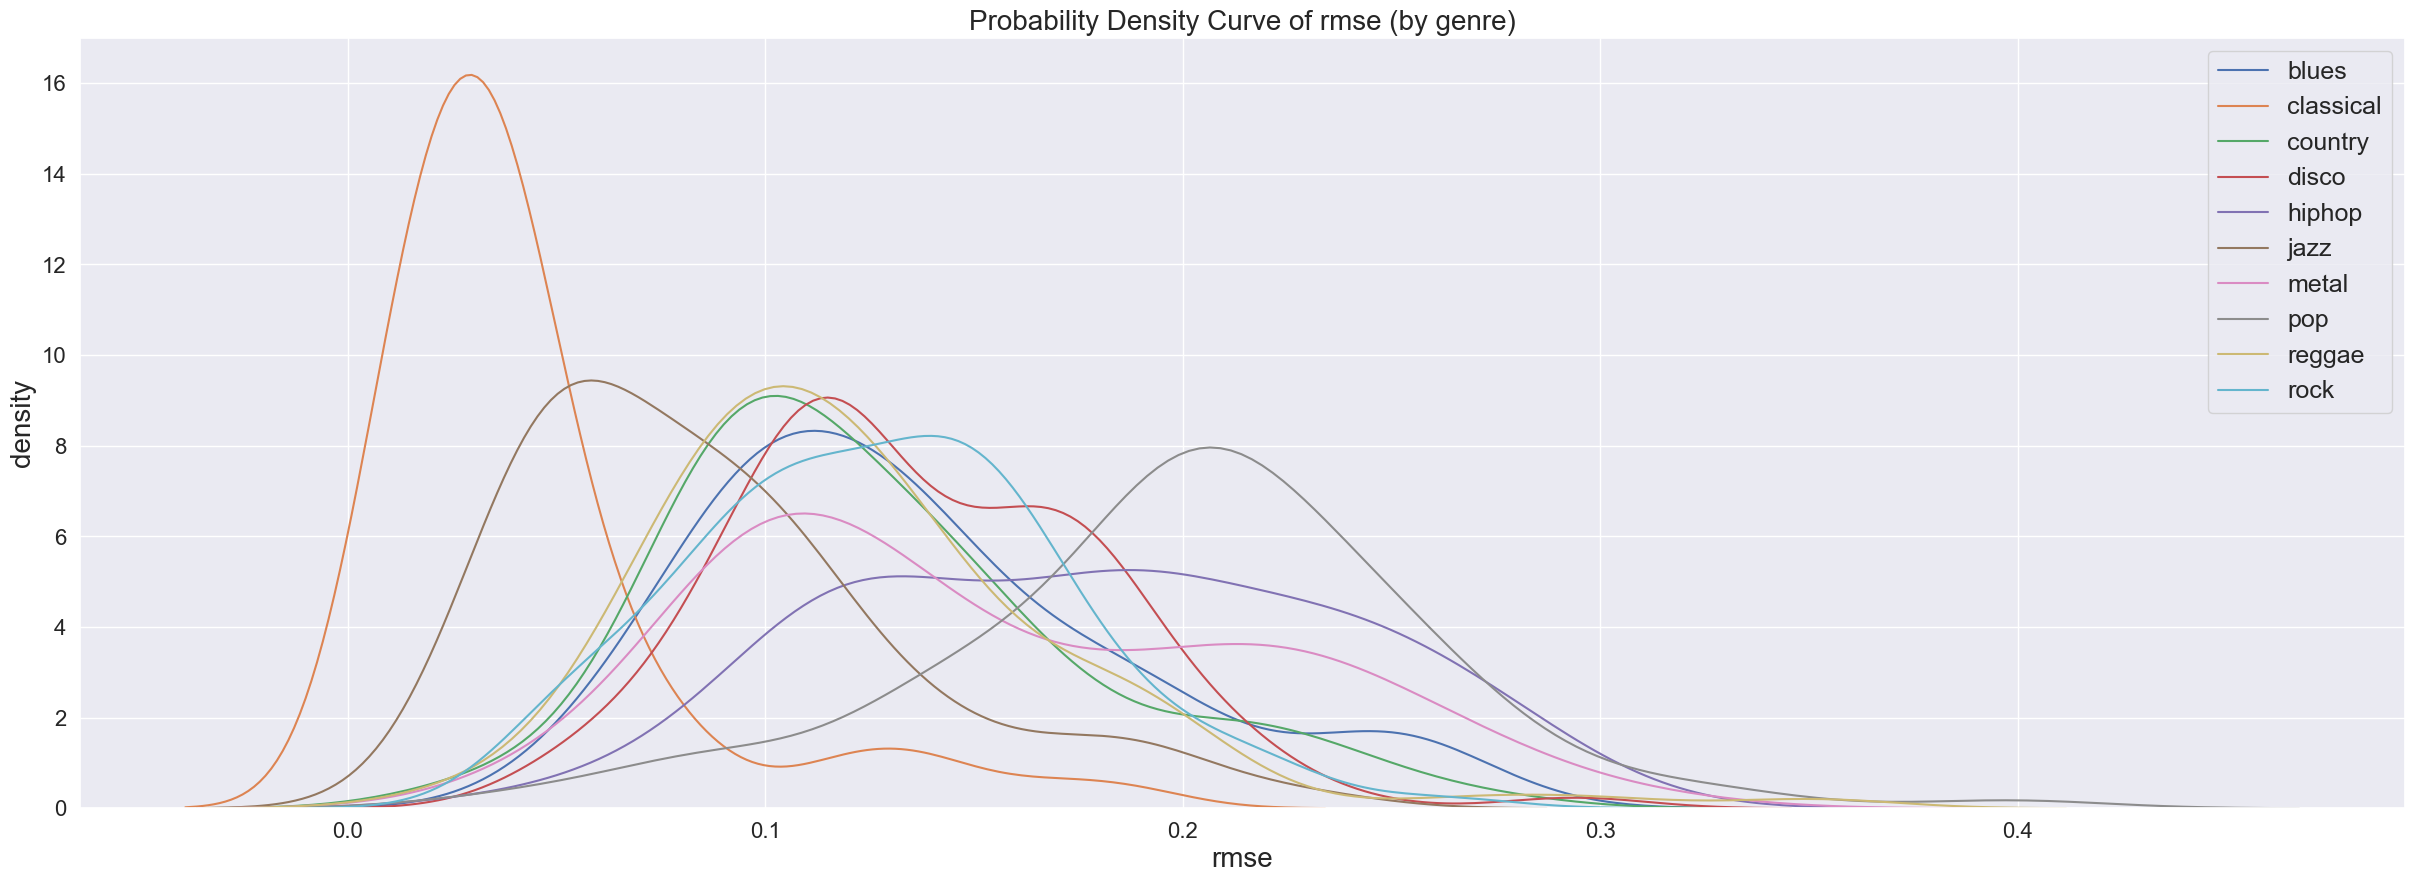

In [68]:
plot_distribution('rmse')

#### rmse mean

If we analyse the mean values per genre, we can see some clear differences in dynamics, where, for example, classical and jazz music aren't as compressed, and have low energy. On the contrary, 'pop', 'hip-hop', and 'metal' have the most mean energy. Mostly due to its compressed audio.

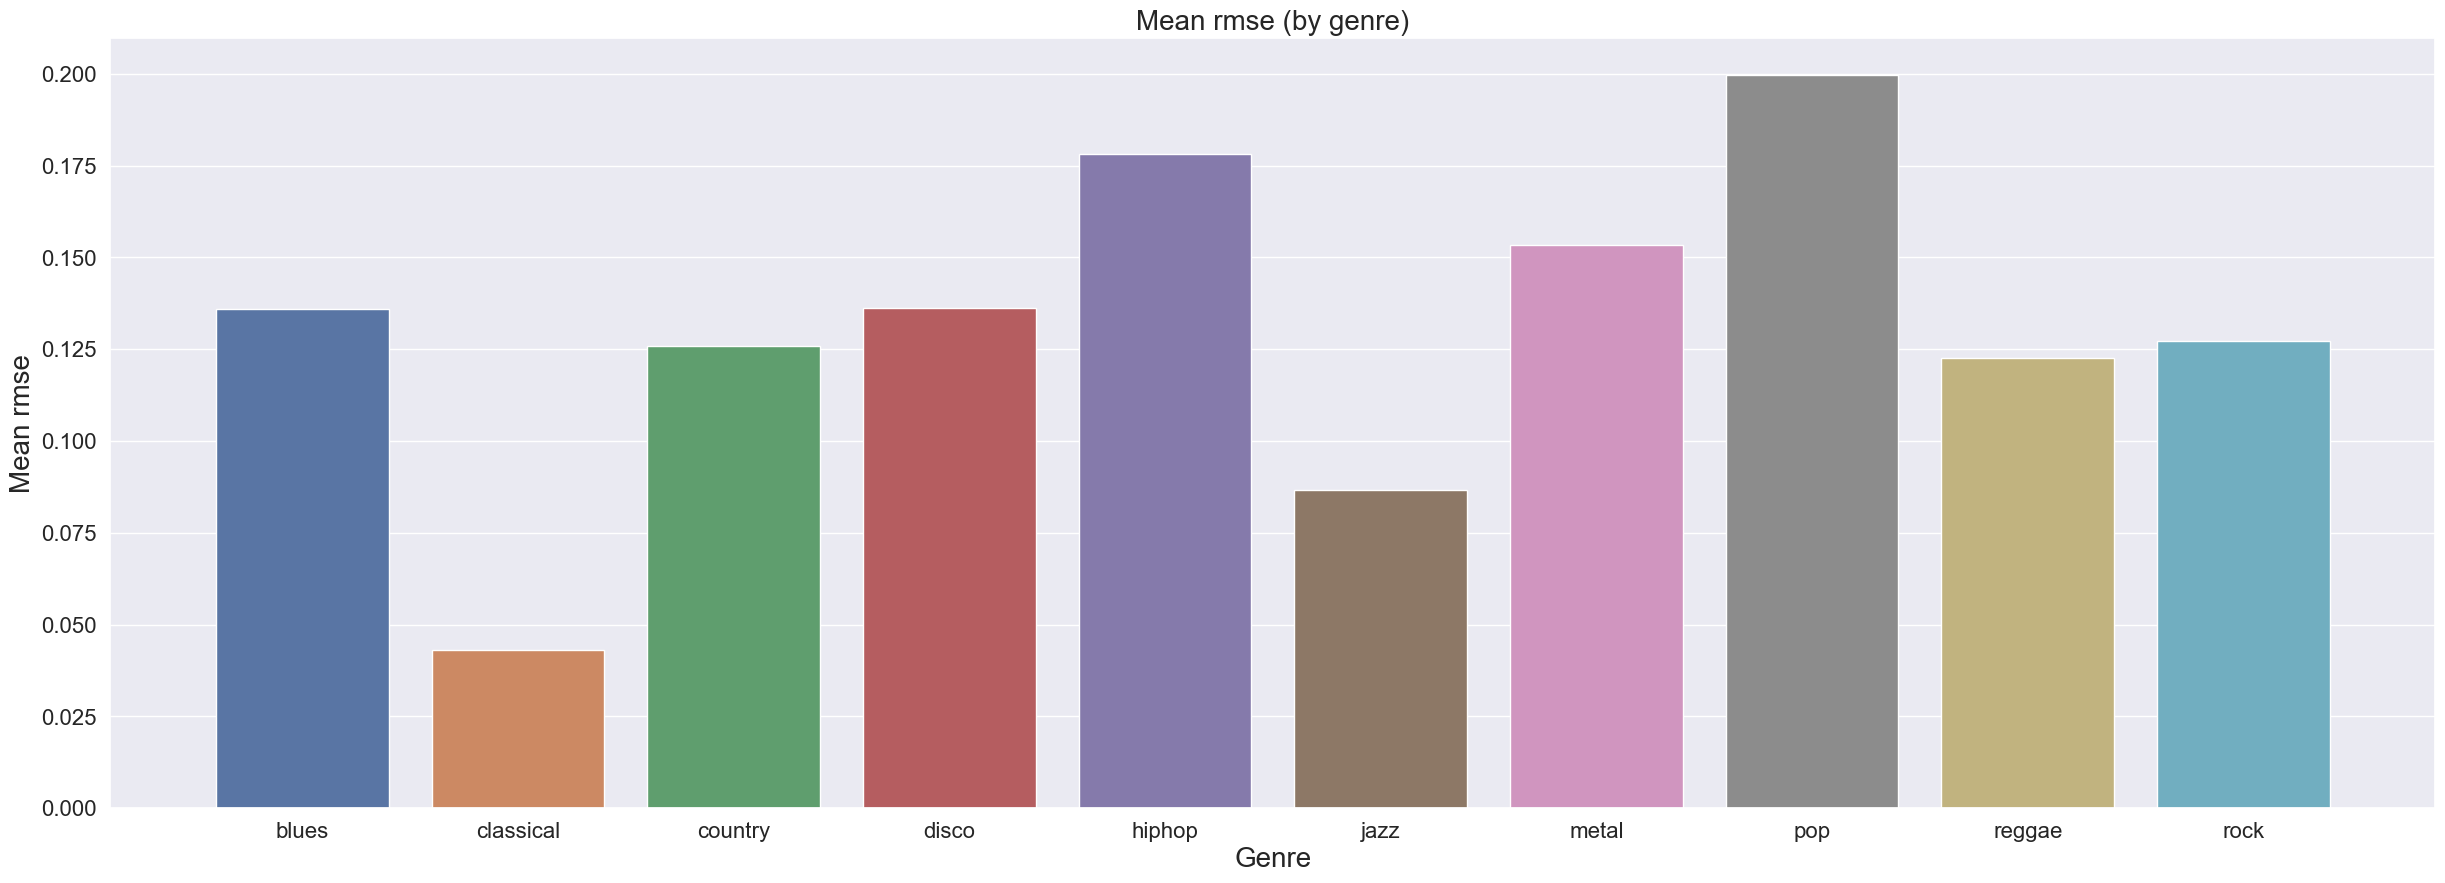

In [69]:
plot_mean('rmse')

### spectral_centroid

Spectral Centroid indicates where the "center of mass" of the spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound. It is calculated as the weighted mean of the frequencies present in the signal, determined using a Fourier transform, with their magnitudes as the weights.

#### spectral_centroid distribution

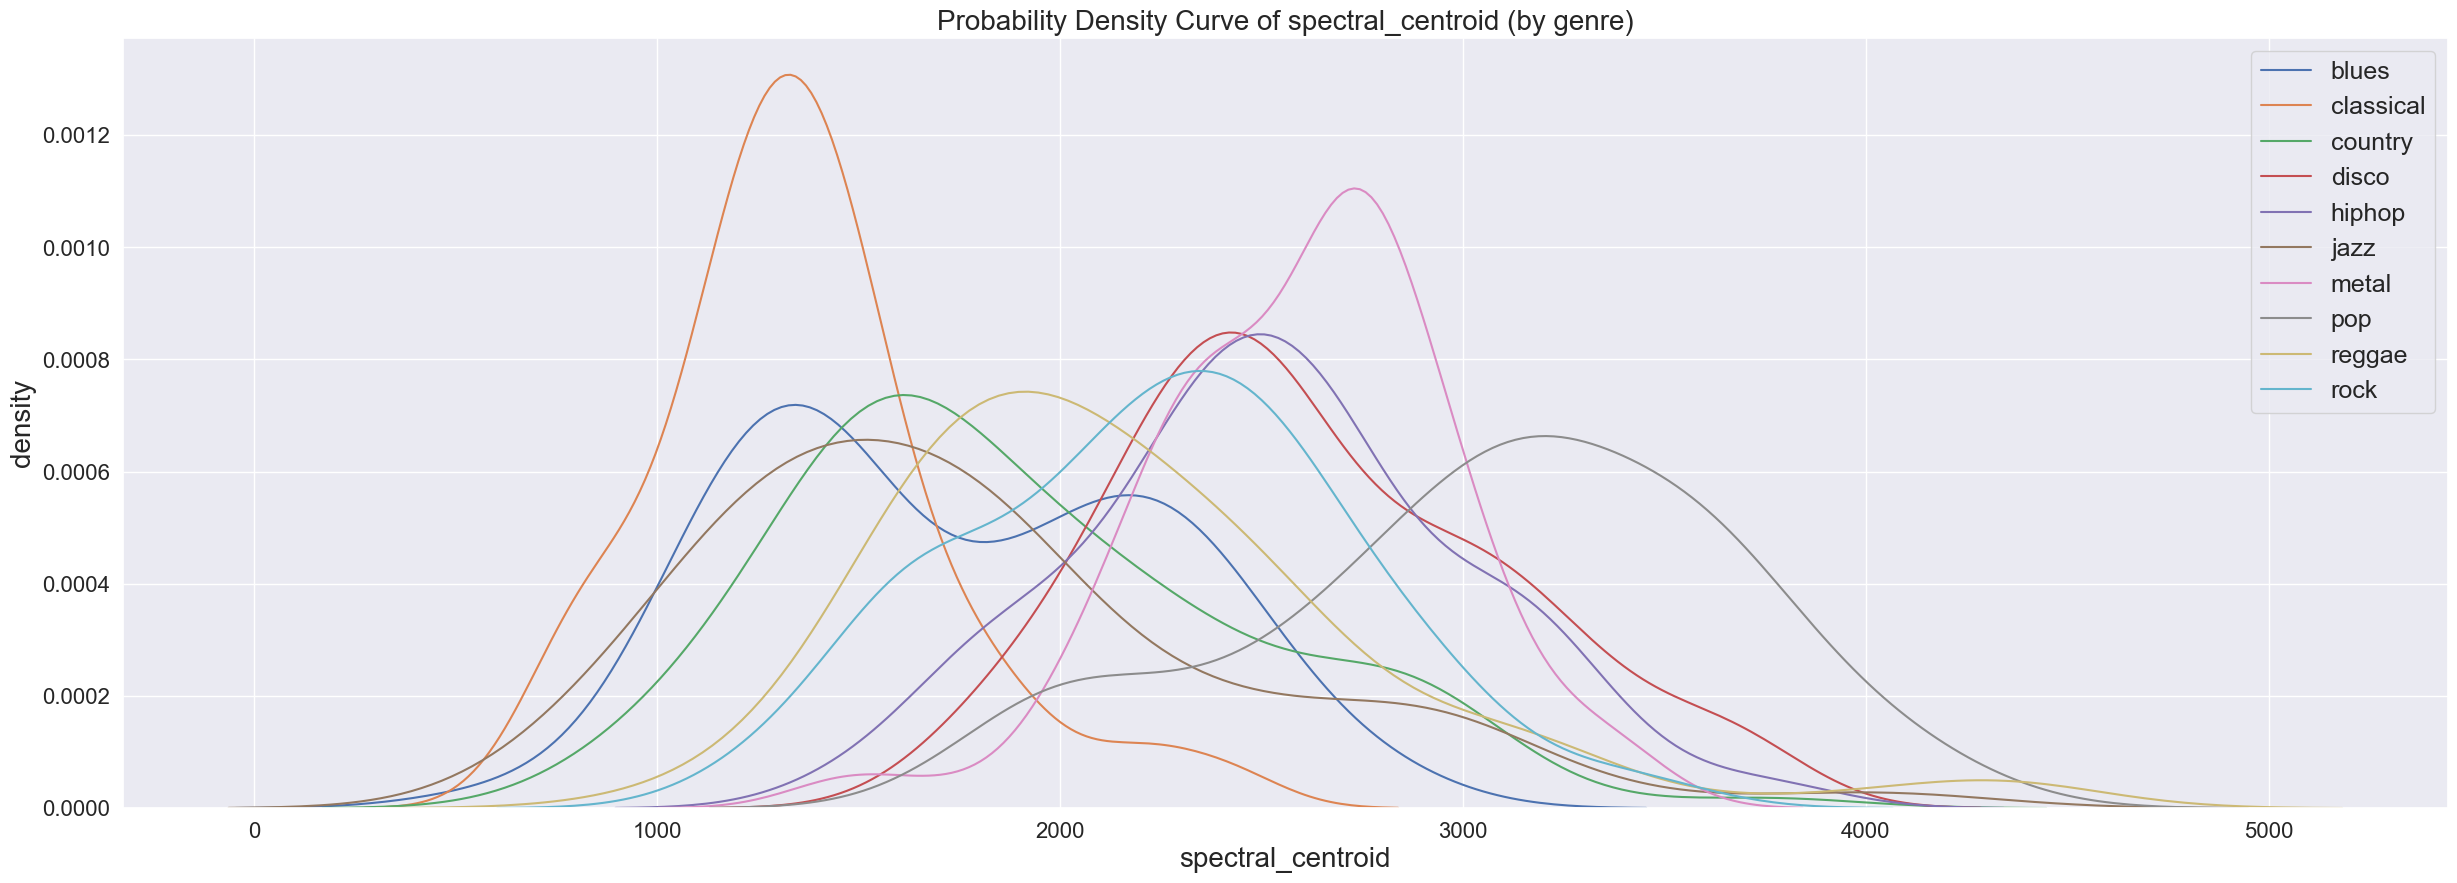

In [70]:
plot_distribution('spectral_centroid')

#### spectral_centroid mean

From the next bar plot we can see a high correlation between spectral centorid information and RMSE.

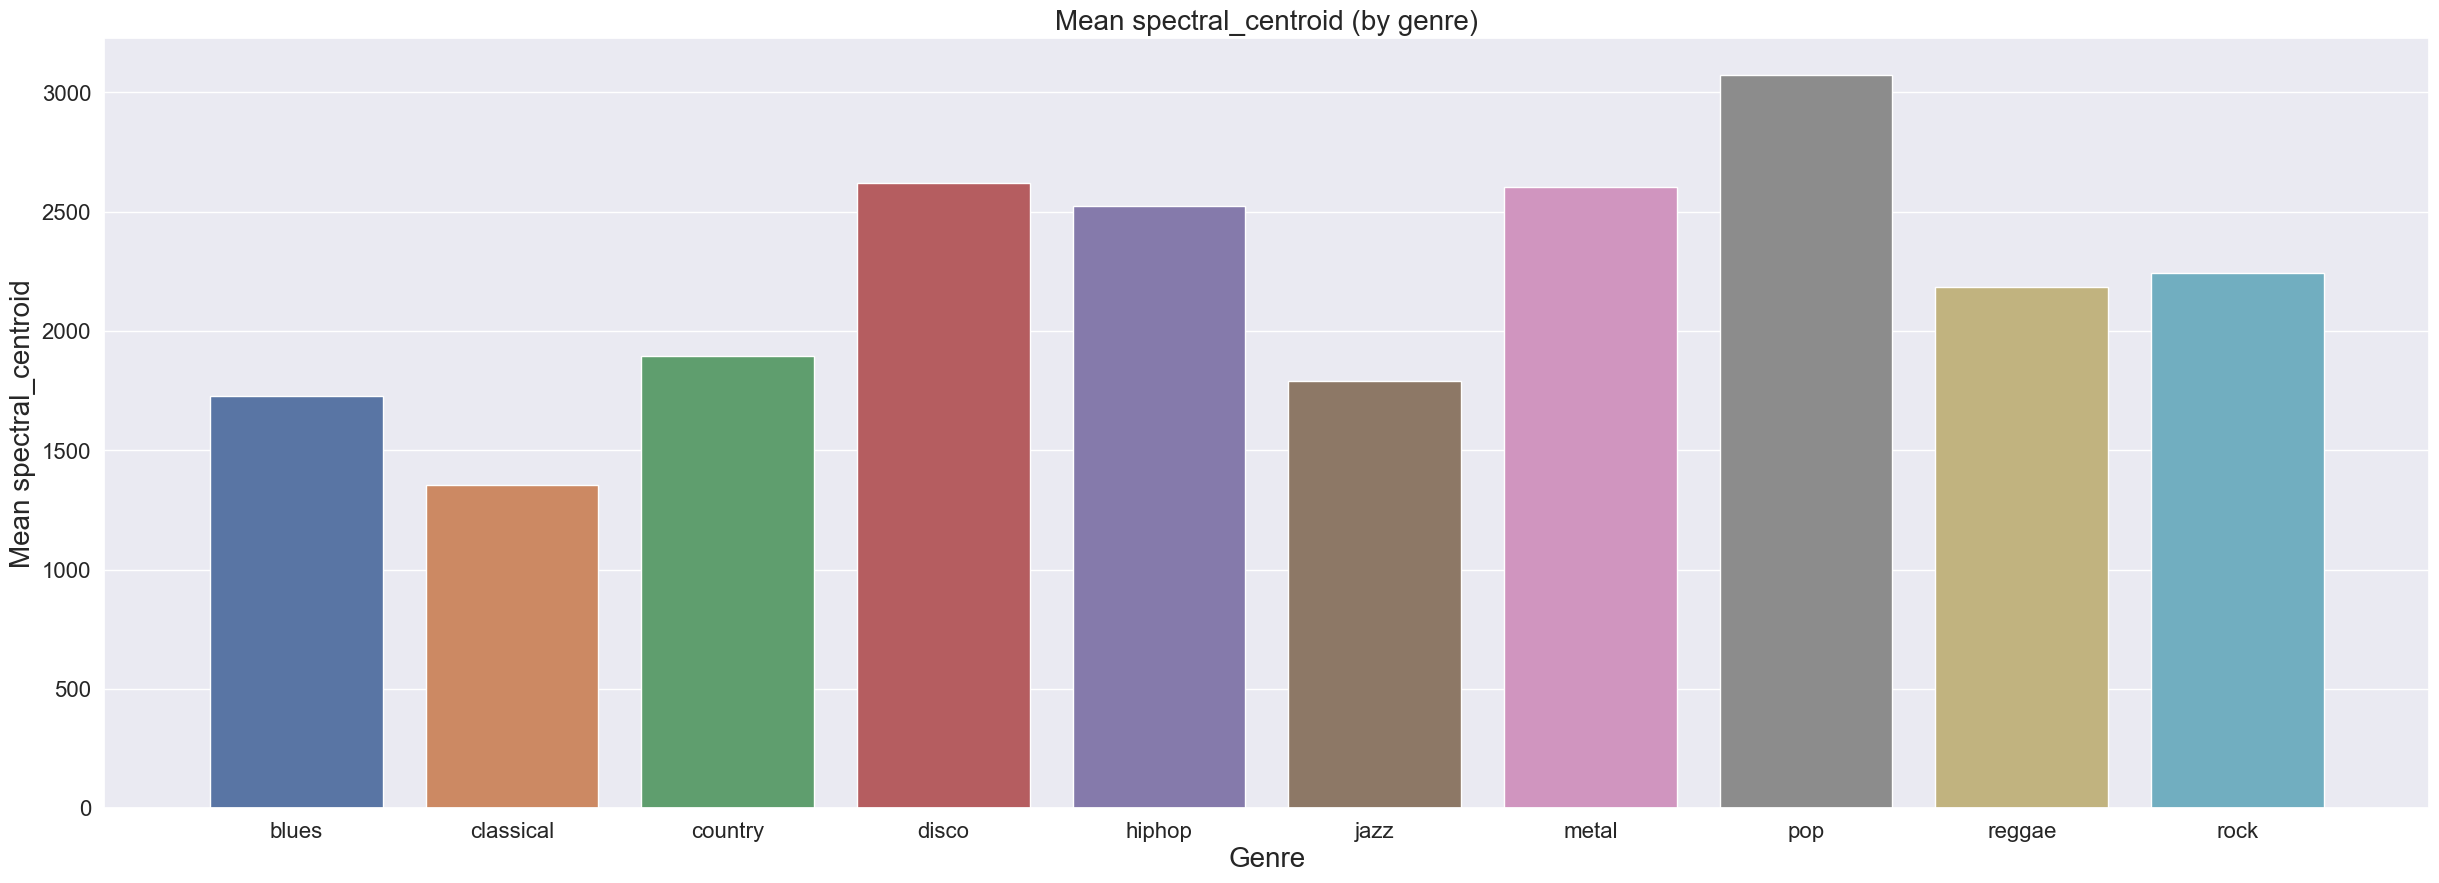

In [71]:
plot_mean('spectral_centroid')

### spectral_bandwidth

It is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value. Basically, it shows us how wide the range of prominent frequencies is.

Through the kernel density estimate (KDE) plot we can see three very distinct peaks: 'classical', 'metal', and 'pop'. Their distributions have relatively low variance, and they have little overlap with each other, meaning that this feature will be useful in distinguishing them.

Most classical songs have a smaller spectral bandwidth. This could be due to many classical songs being played by a single instrument, such as piano, limiting the tonal range.

Pop songs tend to have higher bandwidths. This may be because most pop songs include multiple instruments and vocal parts.

#### spectral_bandwidth distribution

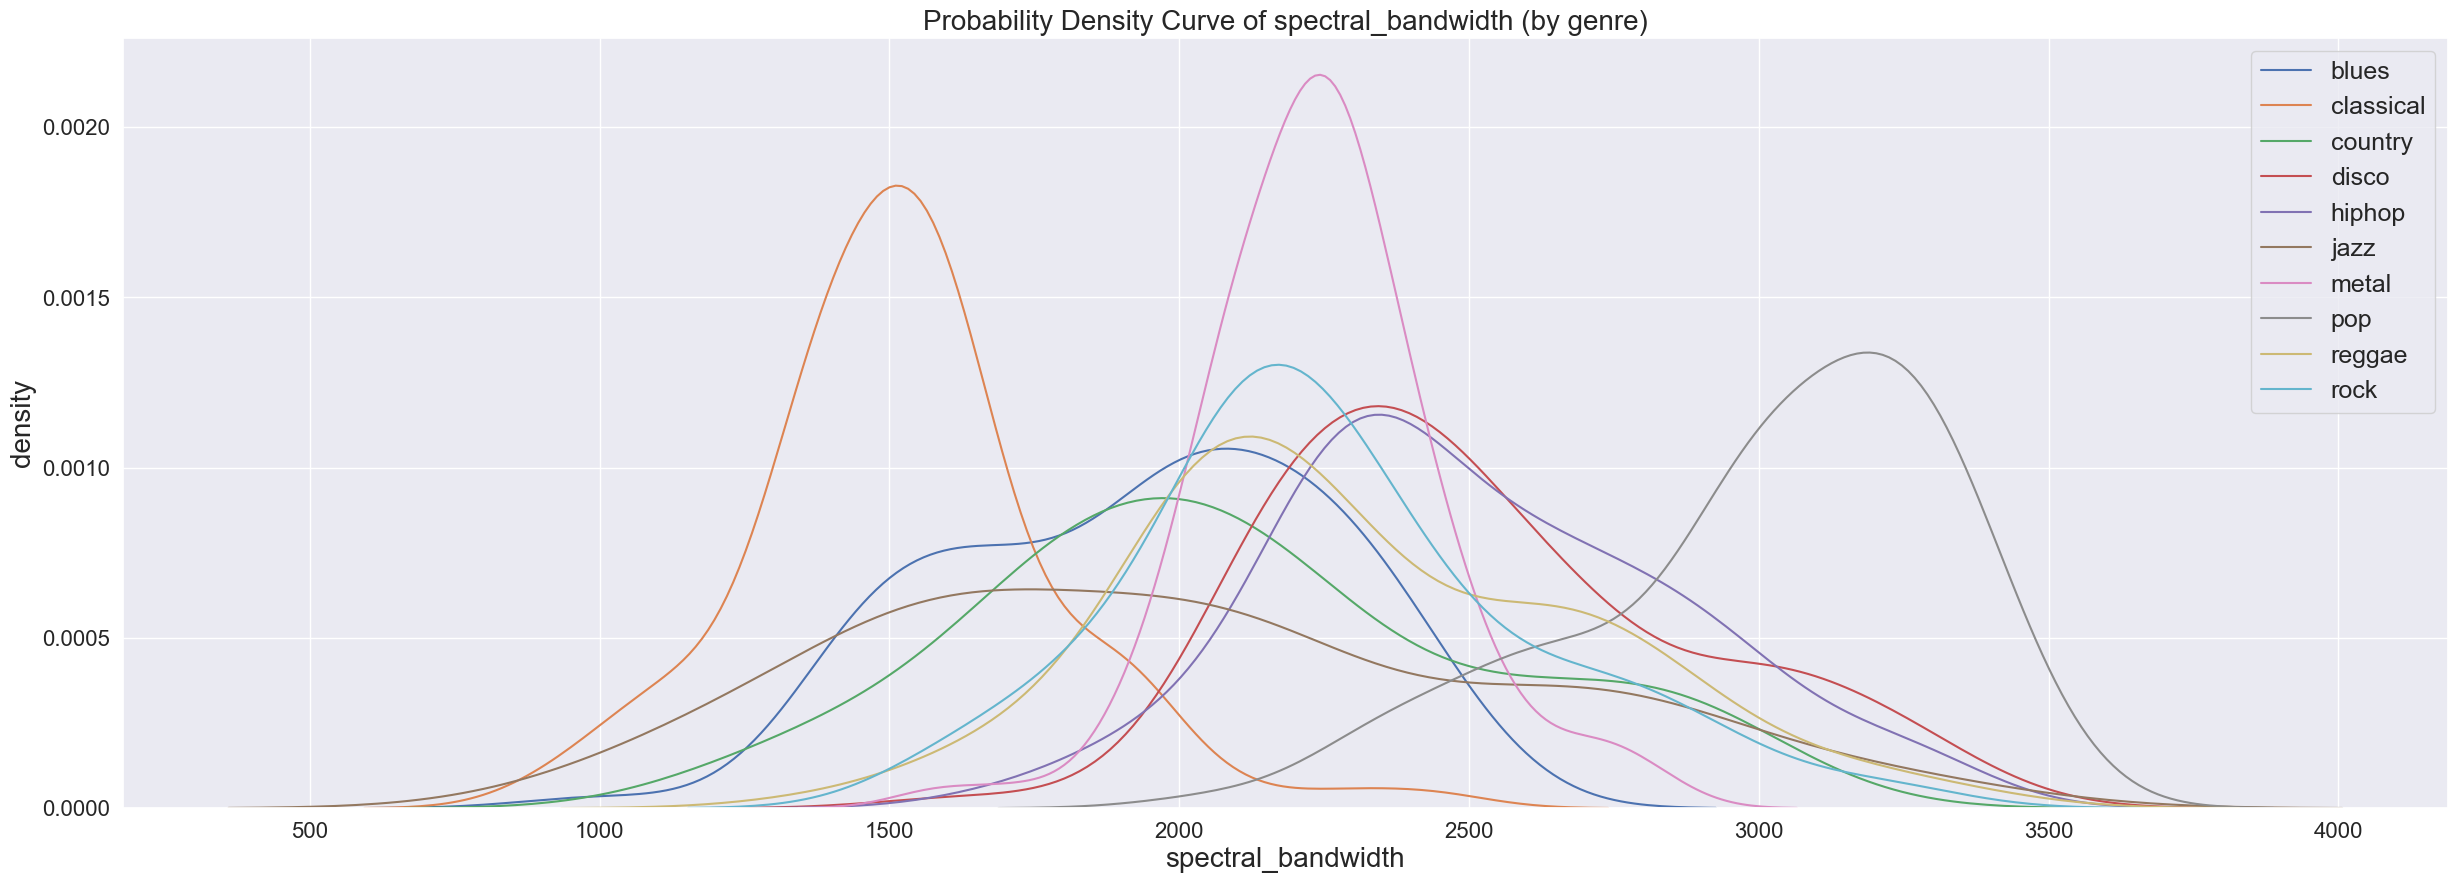

In [72]:
plot_distribution('spectral_bandwidth')

#### spectral_bandwidth mean

Furthermore, the spectral bandwidth means seem very correlated with the spectral centroid.

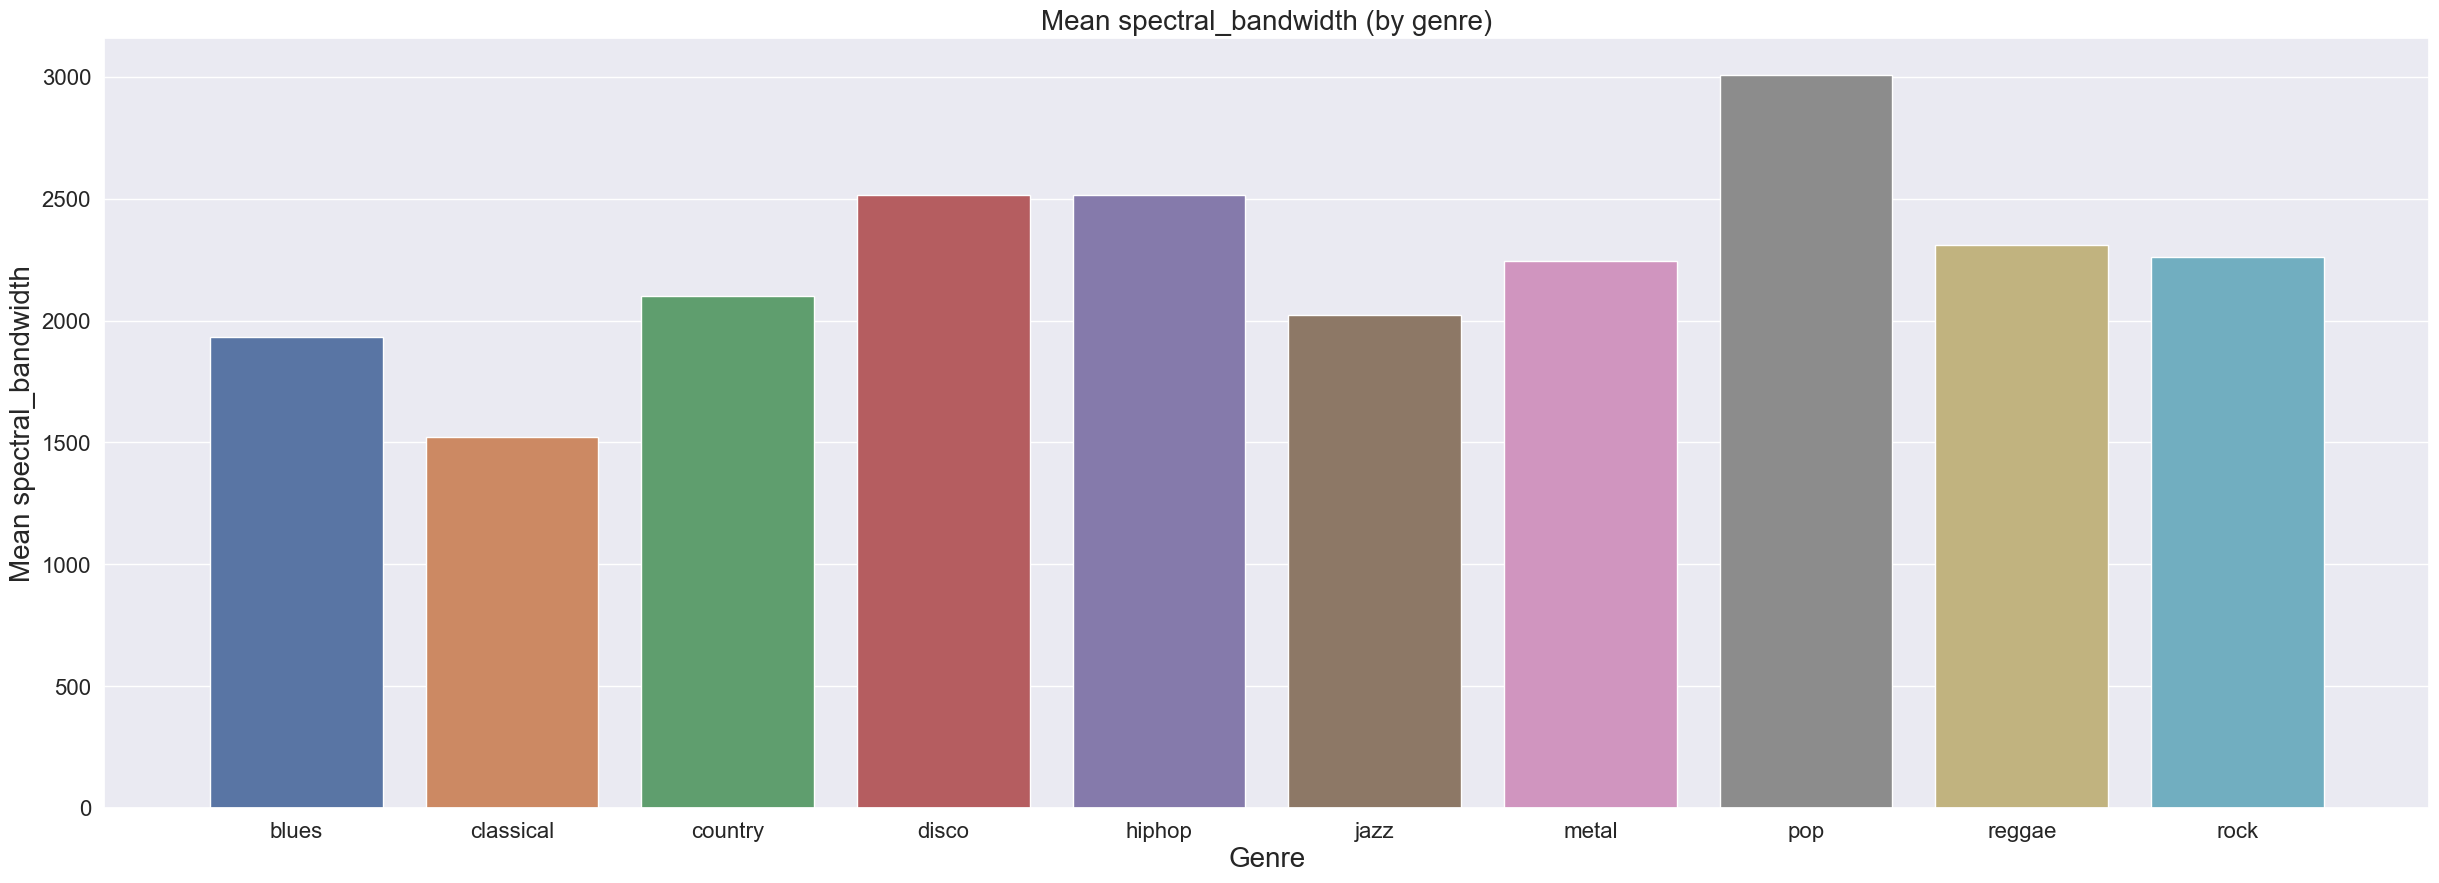

In [73]:
plot_mean('spectral_bandwidth')

### rolloff

The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. A higher rolloff might indicate music that has less overtones (peripheral frequencies with lower amplitude), or that sounds are more "crisp" and clean.

#### rolloff distribution

The rolloff distributions looks almost the same as the spectral bandwidth distributions. This very likely indicates a correlation between the two.

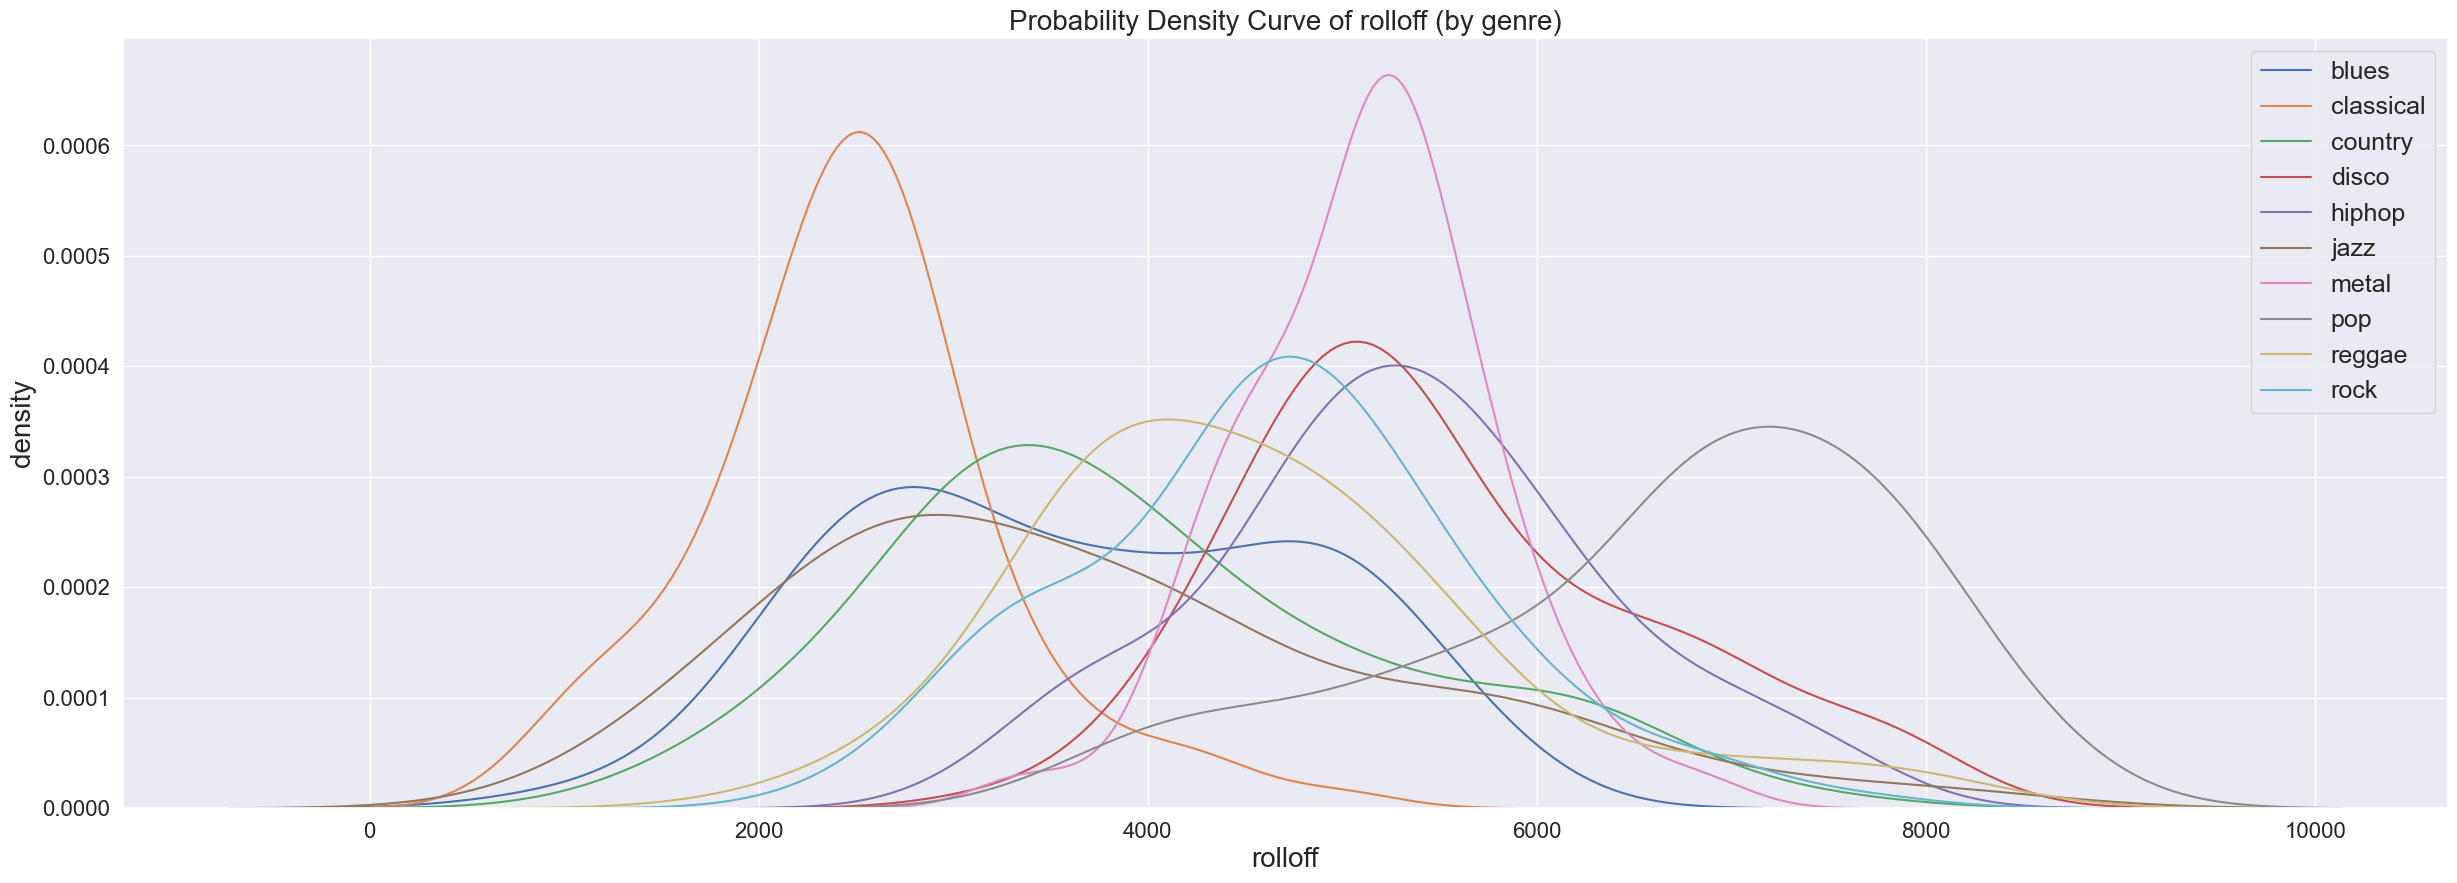

In [74]:
plot_distribution('rolloff')

#### rolloff mean

We can see a lot of variance, and a semblace with the means of the spectral badwidth.

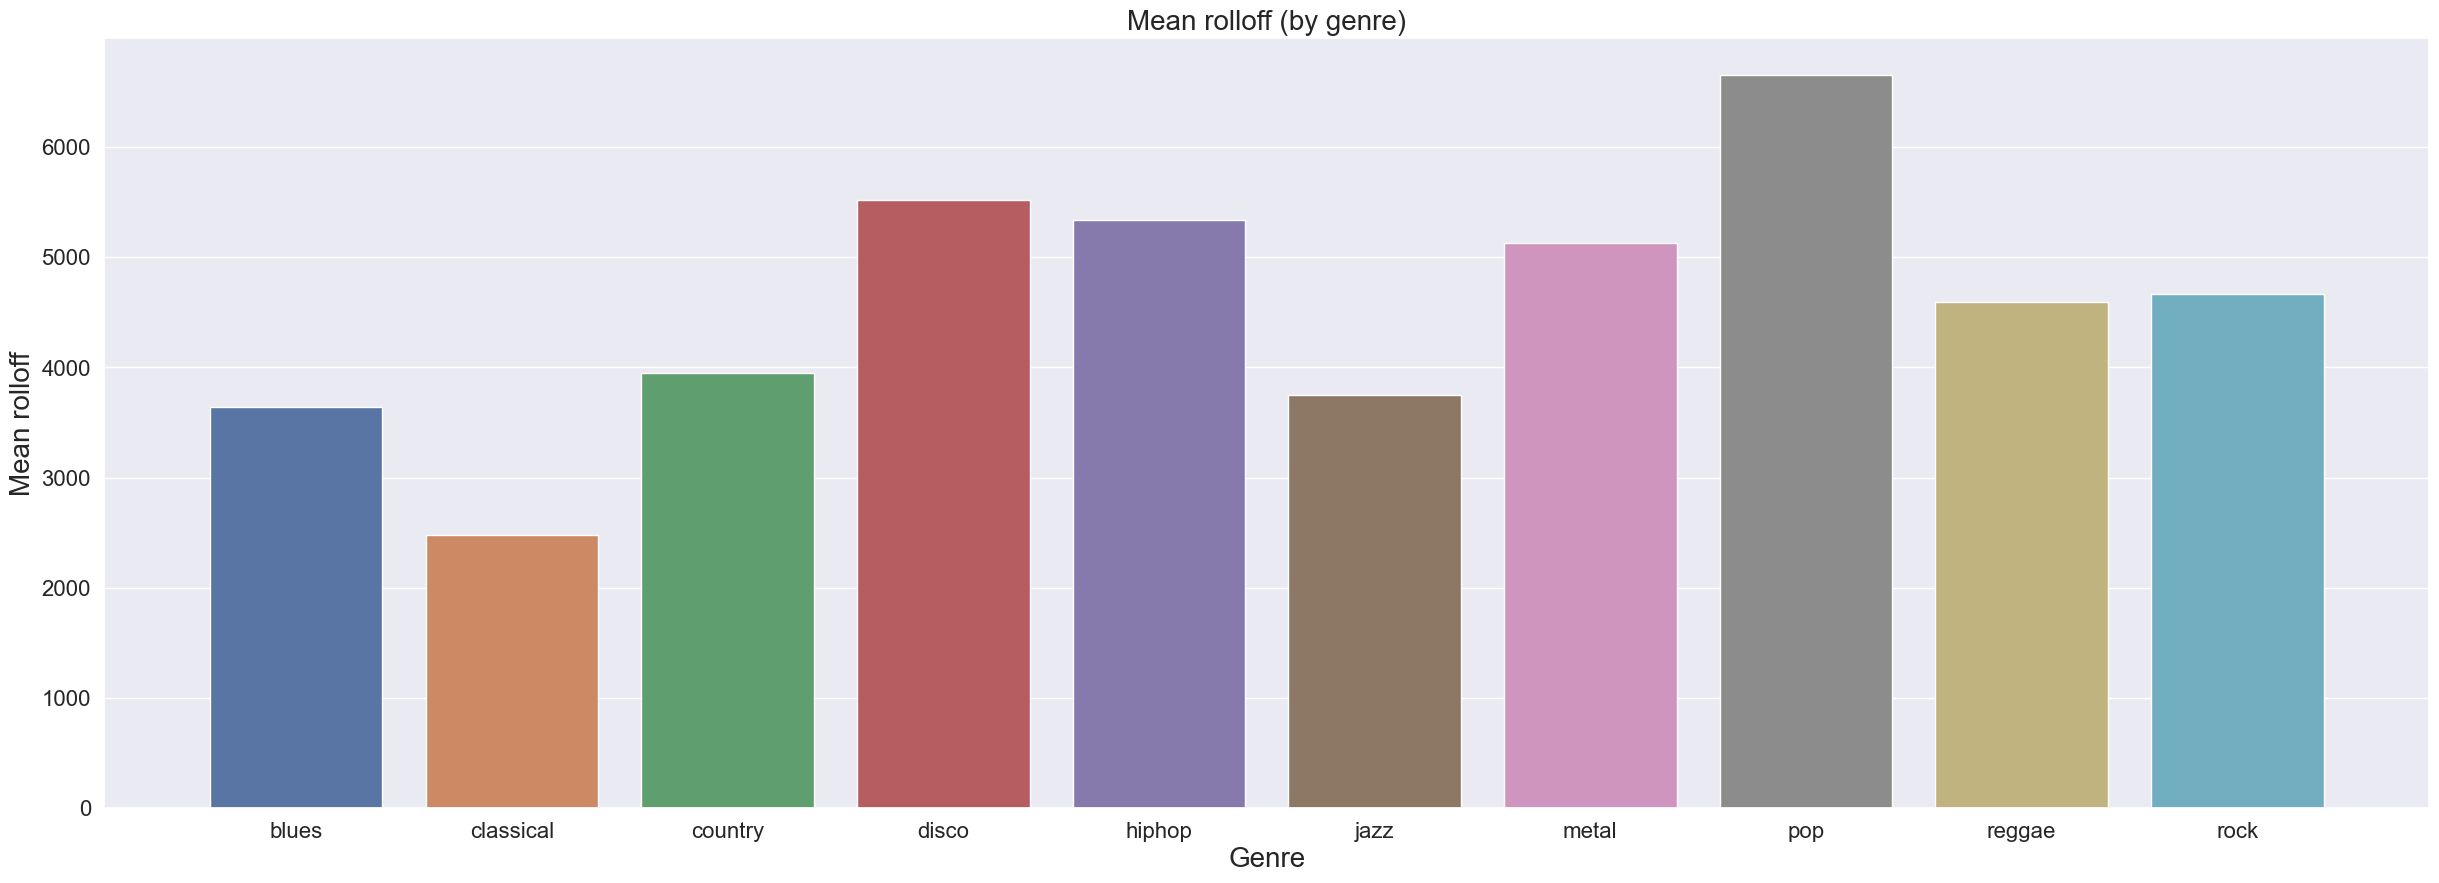

In [75]:
plot_mean('rolloff')

### zero_crossing_rate

The zero-crossing rate (ZCR) is the rate at which a signal transitions from positive to zero to negative or negative to zero to positive. Its value has been extensively used in both speech recognition and music information retrieval for classifying percussive sounds.

#### zero_crossing_rate distribution

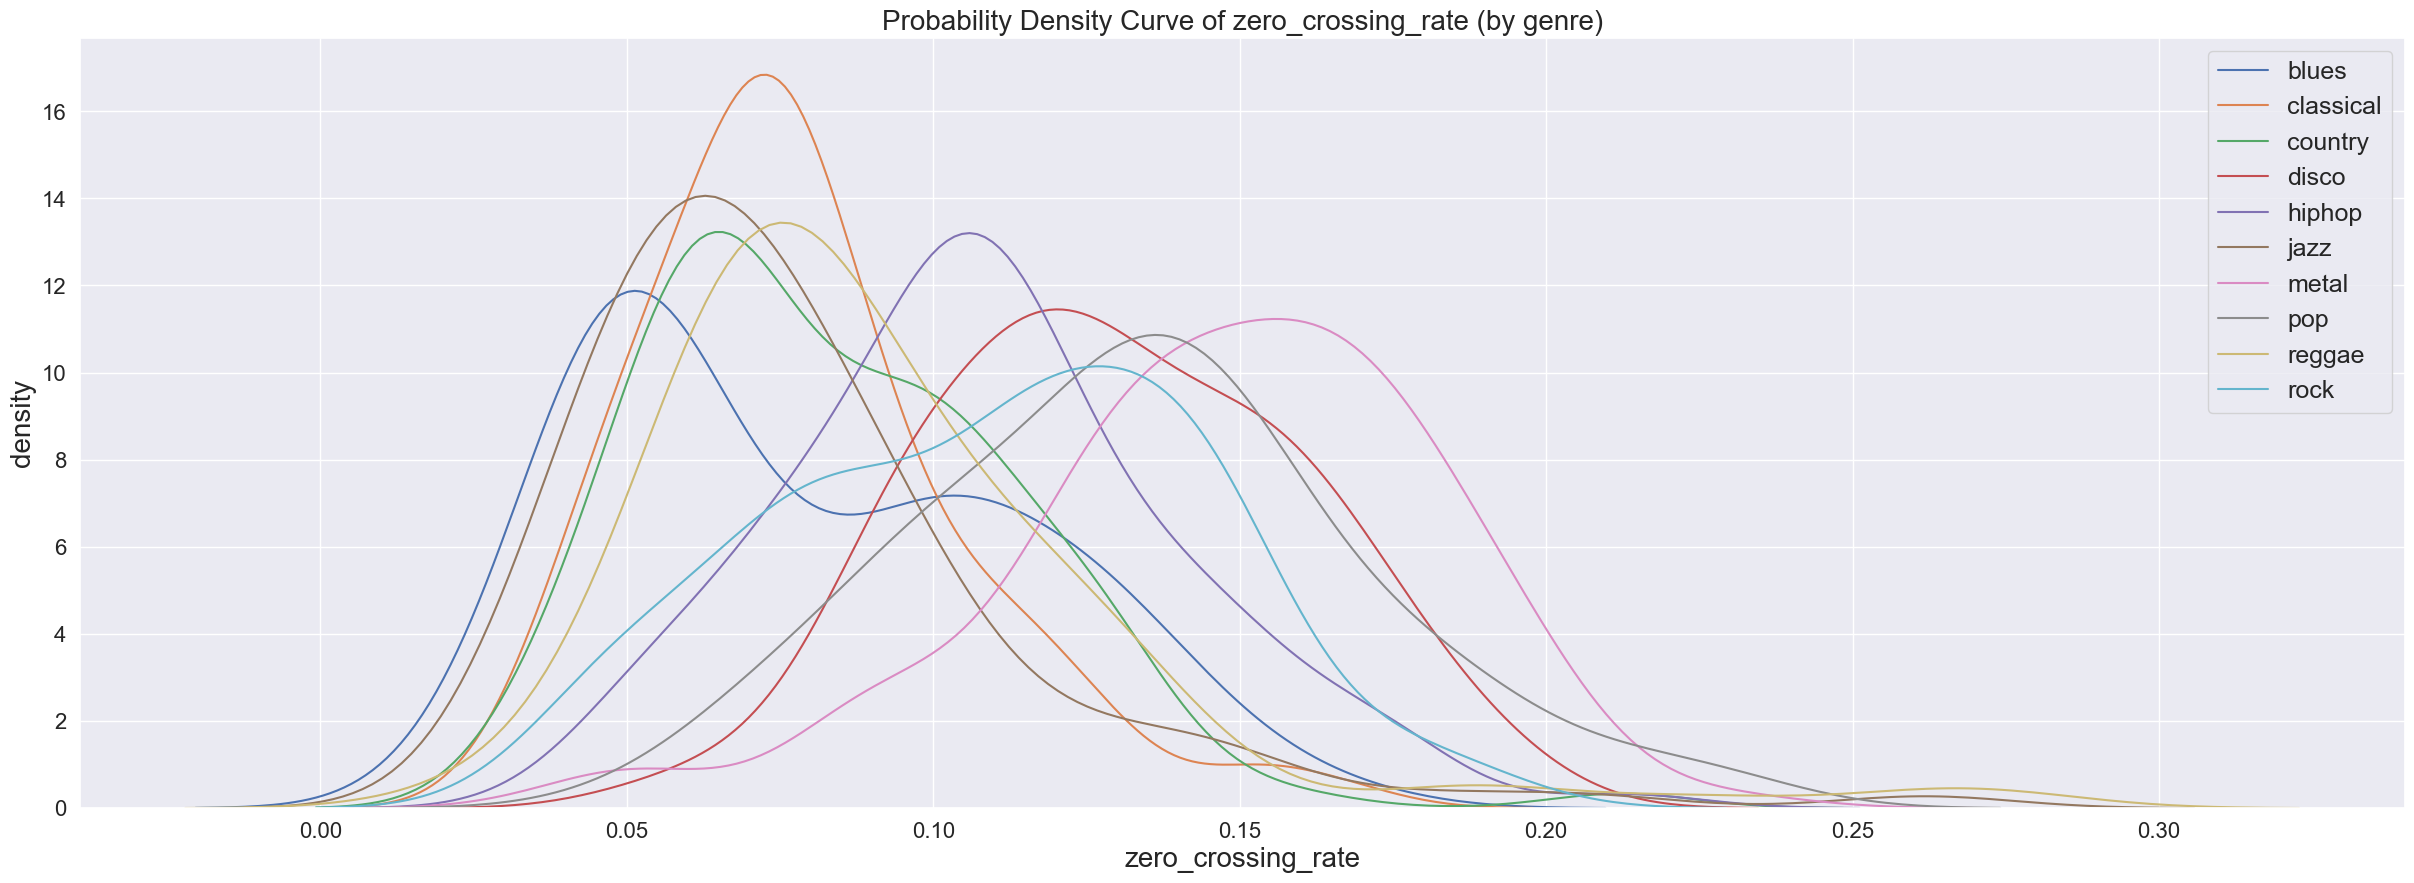

In [76]:
plot_distribution('zero_crossing_rate')

#### zero_crossing_rate mean

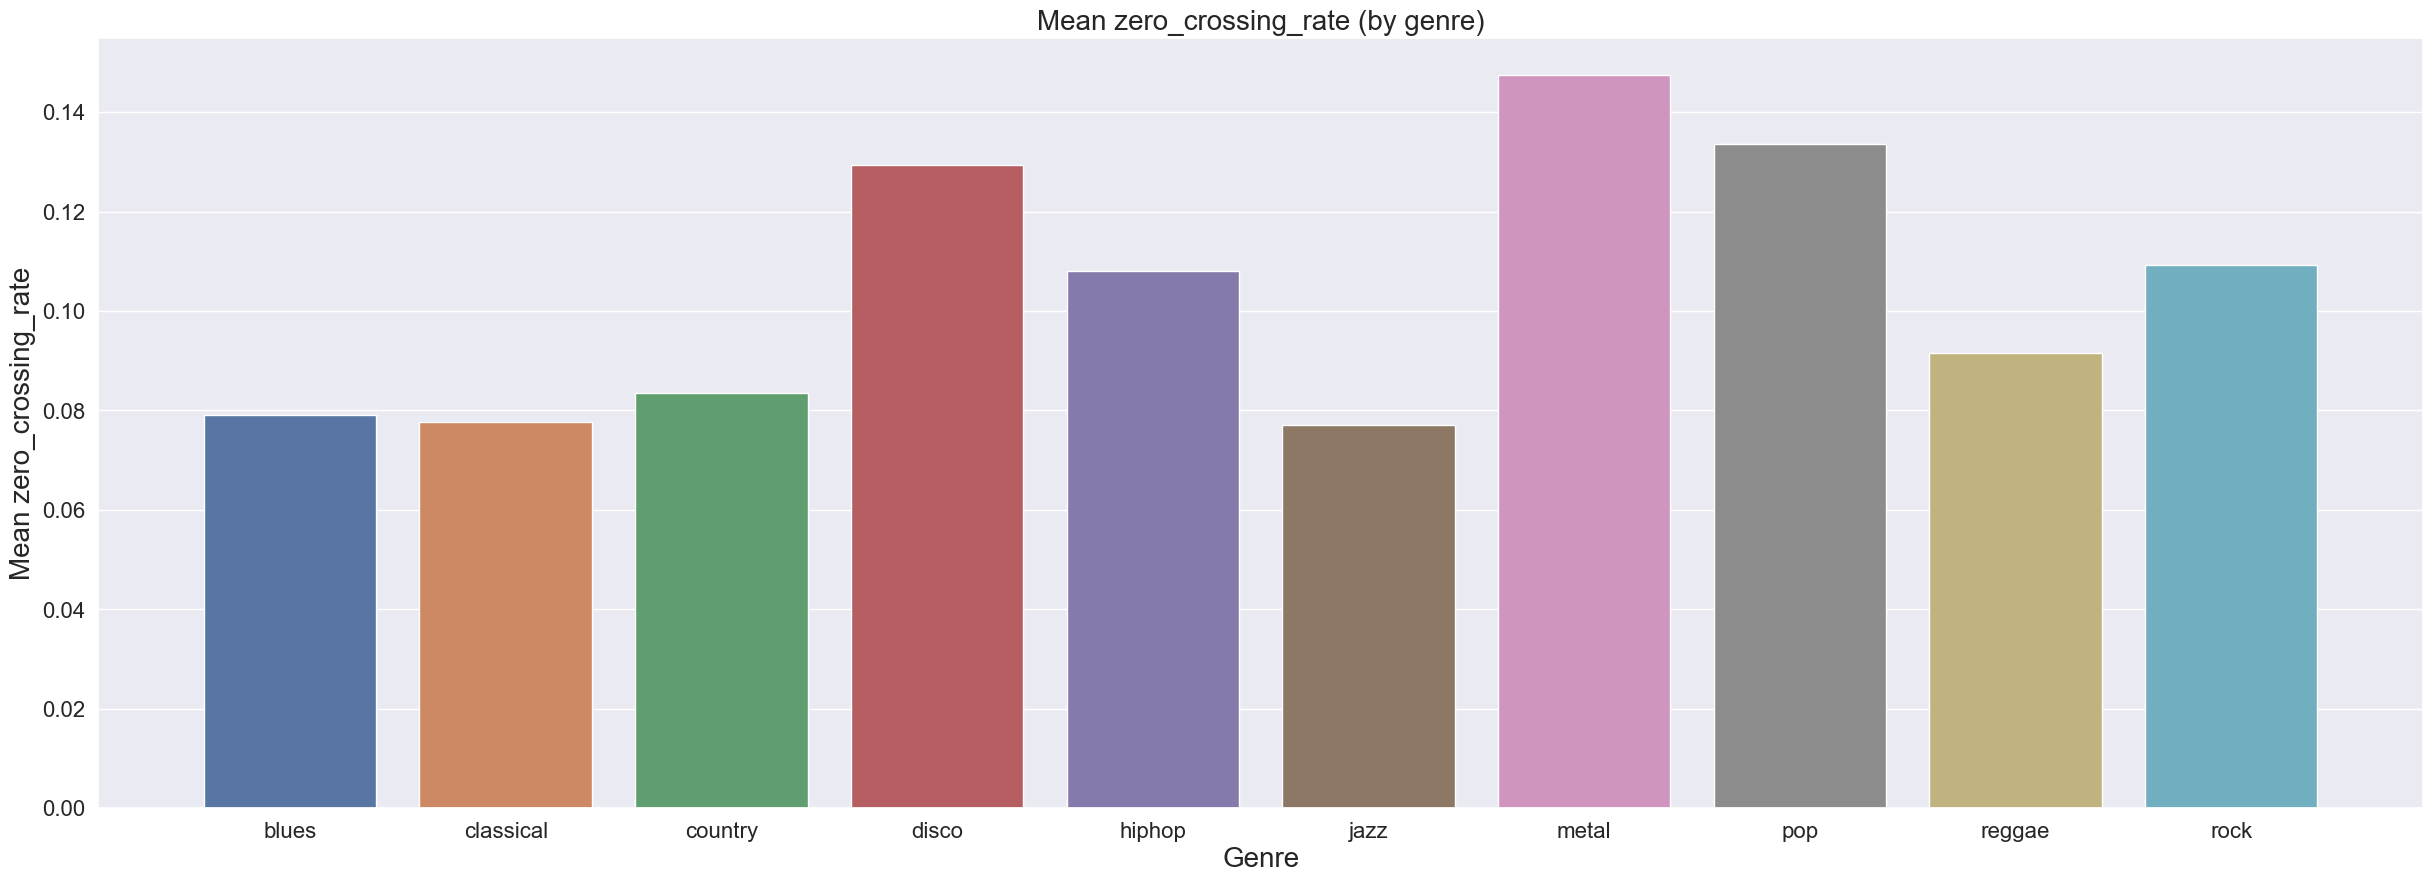

In [77]:
plot_mean('zero_crossing_rate')

### mfccX

The **Mel Scale** is a logarithmic transformation of a signal’s frequency. The core idea of this transformation is that sounds of equal distance on the Mel Scale are perceived to be of equal distance to humans: it mimics our own perception of sound. Consequently, Mel Spectrograms are spectrograms that visualize sounds on the Mel scale as opposed to the frequency domain.

Mel-frequency cepstral coefficient (MFCCs) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

The basic procedure to develop MFCCs is the following:

1. Convert from Hertz to Mel Scale
2. Take logarithm of Mel representation of audio
3. Take logarithmic magnitude and use Discrete Cosine Transformation
4. This result creates a spectrum over Mel frequencies as opposed to time, thus creating MFCCs

LibROSA’s default 20 MFCCs can be visualized. Next, we demonstrate the process with the LibROSA library and through a random guitar audio file:

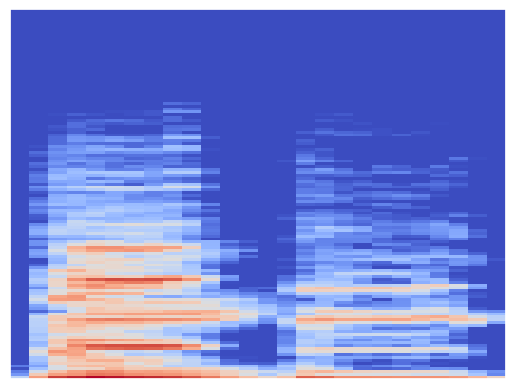

In [78]:
# Using env_mask from wave form articles
def env_mask(wav, threshold):
    # Absolute value
    wav = np.abs(wav)
    # Point wise mask determination.
    mask = wav > threshold
    return wav[mask]

# Load guitar audio
guitar, _ = librosa.load('guitar.wav')

# Mask audio to trim out dead noise (simple data cleaning)
guitar = env_mask(guitar, 0.005)

# Create Mel Spectrograms of sounds
guitarSpec = librosa.feature.melspectrogram(guitar)

# Convert amplitudes to dB
g = librosa.amplitude_to_db(guitarSpec)

# Plot mel spectrograms
librosa.display.specshow(g)

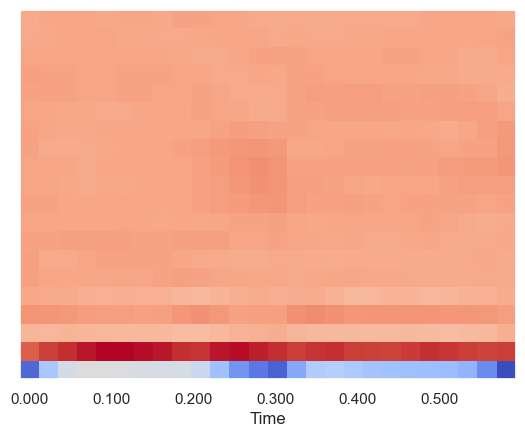

In [79]:
# Take MFCCs of sound:
gMFCC = librosa.feature.mfcc(guitar)

# Plot MFCCs
librosa.display.specshow(gMFCC, x_axis='time')

We can use this coefficients as new varables of the model.

## Feature Correlations

This heatmap shows the correlations between all of the features, which quantifies how close they are to a perfect linear relationship.

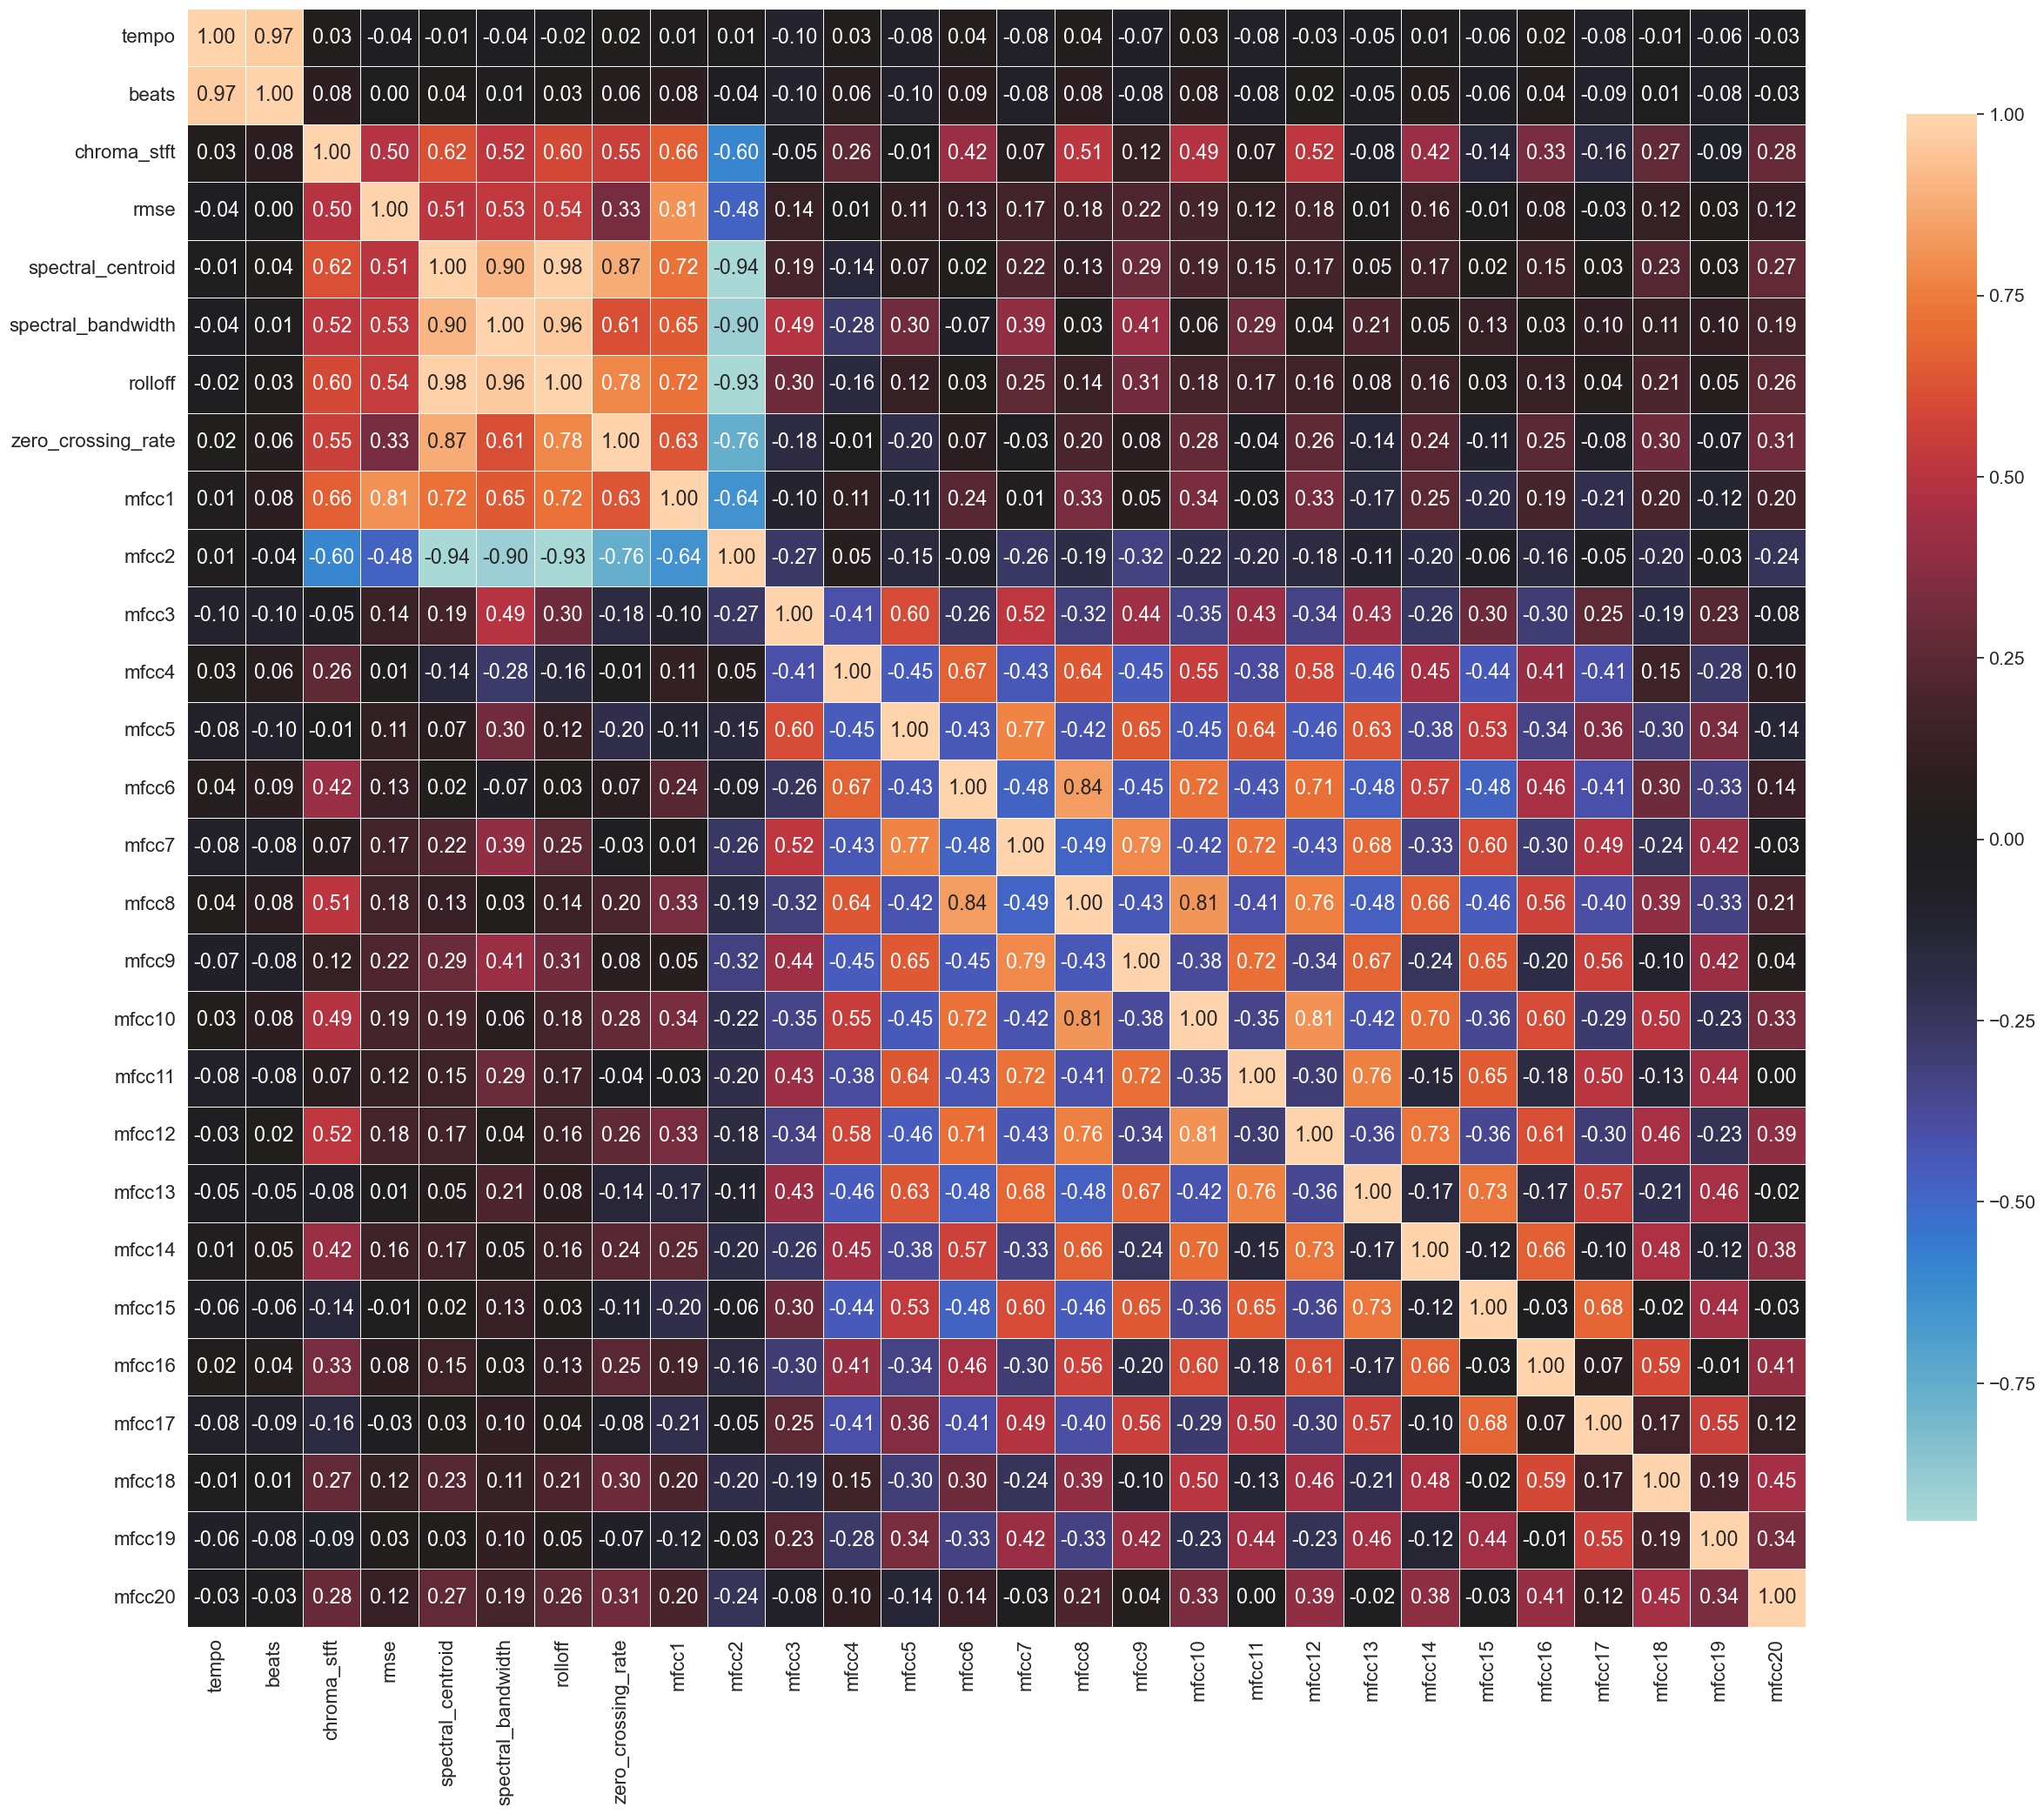

In [80]:
# Compute correlations between all variables (except 'filename' and 'label')
correlations = df.iloc[:,1:-1].corr()

sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, 
            linewidth=.5, annot=True, cbar_kws={"shrink": .70})
plt.tick_params(labelsize=16)
plt.show()
sns.set(font_scale=1)

We can see that 'rolloff', 'spectral_centroid', and 'spectral_bandwidth' are highly correlated. Furthermore, we can see that 'beats' is also very correlated to 'tempo' (not sure still what causes the difference).

We can see 'spetral_centroid' is also very correlated to 'zero_crossing_rate', which is intuitive since both are highly dependent on the type of frequencies present in the audio.

Next, let's explore the variables with strongest positive correlations:

In [81]:
df_corr = correlations.unstack()
sorted_df_corr = df_corr.sort_values(kind="quicksort")
sorted_df_corr[744:-28] # Remove correlation = 1

mfcc8               mfcc6                 0.837294
mfcc6               mfcc8                 0.837294
spectral_centroid   zero_crossing_rate    0.874755
zero_crossing_rate  spectral_centroid     0.874755
spectral_centroid   spectral_bandwidth    0.904438
spectral_bandwidth  spectral_centroid     0.904438
rolloff             spectral_bandwidth    0.956194
spectral_bandwidth  rolloff               0.956194
beats               tempo                 0.966179
tempo               beats                 0.966179
rolloff             spectral_centroid     0.979633
spectral_centroid   rolloff               0.979633
dtype: float64

Next, let's explore the variables with the strongest negative correlations.

We can see that MFCC2 (the second coefficient of the Mel-frequency cepstrum, a mathematical representation of the sound) has a strong negative correlation with 'spectral_centroid', 'rolloff', and 'spectral_bandwidth'.

In [82]:
sorted_df_corr[:10] # Get 5 highest correlations

spectral_centroid   mfcc2                -0.940171
mfcc2               spectral_centroid    -0.940171
rolloff             mfcc2                -0.934305
mfcc2               rolloff              -0.934305
spectral_bandwidth  mfcc2                -0.896660
mfcc2               spectral_bandwidth   -0.896660
zero_crossing_rate  mfcc2                -0.760127
mfcc2               zero_crossing_rate   -0.760127
                    mfcc1                -0.638911
mfcc1               mfcc2                -0.638911
dtype: float64

## Scatter Plots

With these scatter plots we can visualize the relationships with the highly correlated variables.

We can see that some variables have negative, non-linear relationships with MFCC2.

TODO: understand what each MFCC represents and explain why mfcc2 has this high correlation with 'spectral_centroid', 'rolloff', and 'spectral_bandwidth'.

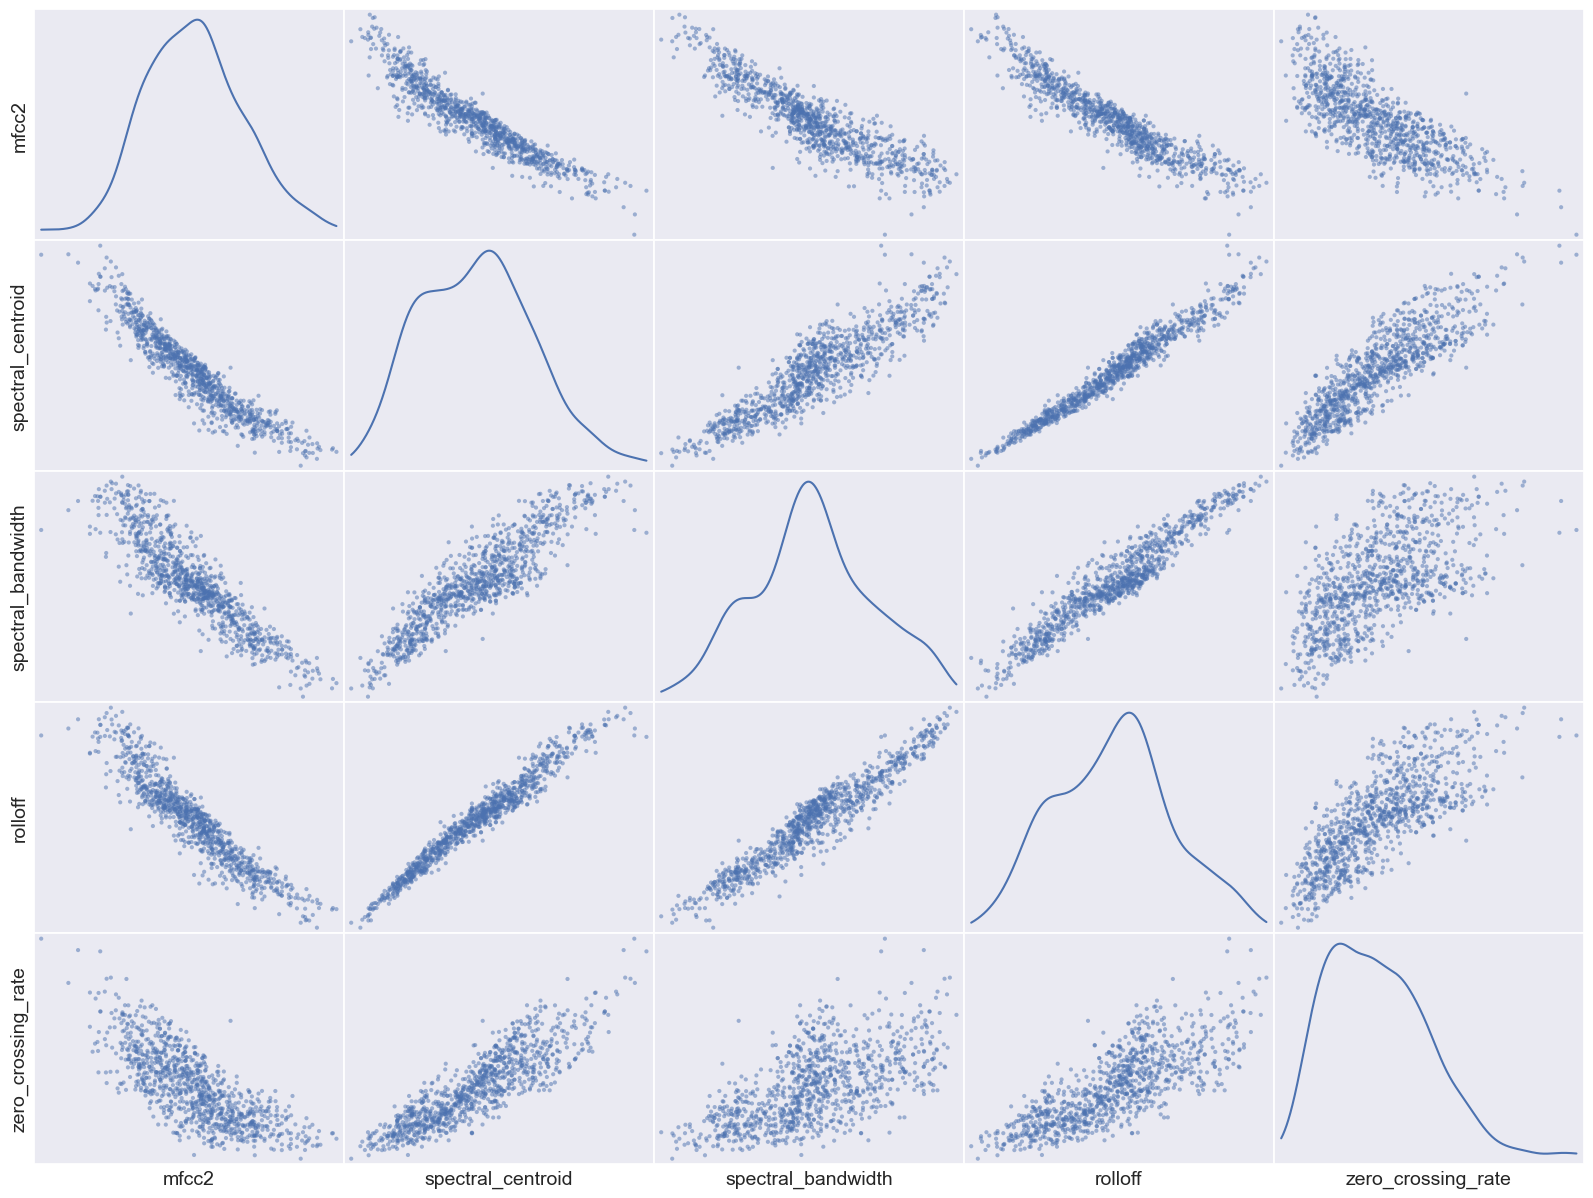

In [83]:
attributes = ['mfcc2', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 
             'zero_crossing_rate']

sm = pd.plotting.scatter_matrix(df[attributes], figsize=(20, 15), diagonal = "kde")

# hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

for x in sm.ravel():
    x.set_xlabel(x.get_xlabel(), fontsize=14)
    x.set_ylabel(x.get_ylabel(), fontsize=14)

## Preprocessing and Feature Selection

For this dataset all data is numerical and we have no NaN values.

In [84]:
df.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

We can therefore remove the filename variable.

In [85]:
# Drop 'filename' column
df = df.drop('filename', axis=1)

# Set predictive and target variables
X = df.loc[:, df.columns != 'label']
y = df['label']

## PCA

PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data.

In [86]:
from sklearn.decomposition import PCA
X1 = X

Let's test PCA, firstly with 3 components:

In [87]:
pca = PCA(n_components = 3)
# Fit the model with X_pca and apply the dimensionality reduction on X_pca
X_pca = pca.fit_transform(X1)

We can then check the amount of variance explained by each of the selected components. We can see it gets 98% of the first component.

In [88]:
pca.explained_variance_ratio_

array([0.98490406, 0.01064583, 0.00245375])

Let's create a new DataFrame with the new components:

In [89]:
columns_pca = ['PC1', 'PC2','PC3']
pc_df_ = pd.DataFrame(data = X_pca, 
                           columns = columns_pca)

In [90]:
pca_df = pd.concat([pc_df_, df['label']], axis = 1)
pca_df.head()

PC1         PC2        PC3  label
0  -437.764309  194.339340 -70.976368  blues
1 -2724.658925   -2.261800  29.199490  blues
2 -1882.730034 -283.925766  58.805190  blues
3 -2125.187321   56.204873 -67.131142  blues
4  -770.057069  -73.147524 -70.060711  blues

### 2D Representation

[]

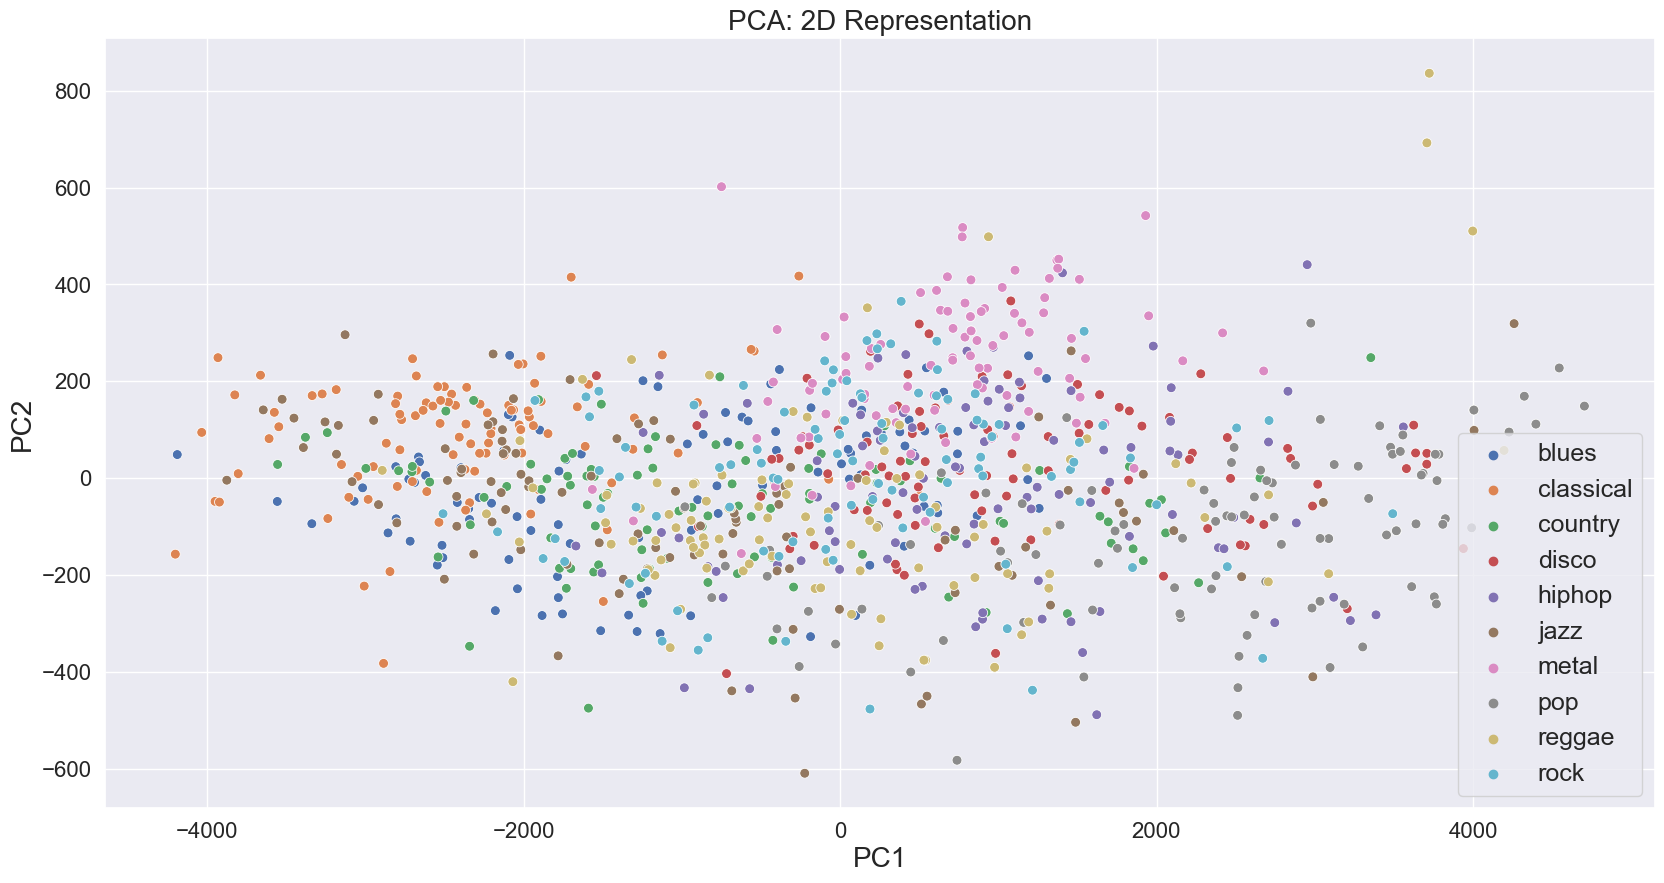

In [91]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=pca_df['label'], s=50)

plt.title("PCA: 2D Representation", fontsize=20)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.tick_params(labelsize=16)
plt.legend(fontsize=18)
plt.plot()

In [92]:
coordinates = pca.components_.T * np.sqrt(pca.explained_variance_)
features = X.columns

columns_pca = ['PC1', 'PC2','PC3']
new_coordinates = pd.DataFrame(data = coordinates, 
                           columns = columns_pca)

new_coordinates = pd.concat([pd.DataFrame(features, columns = ['Feature']), new_coordinates], axis = 1)

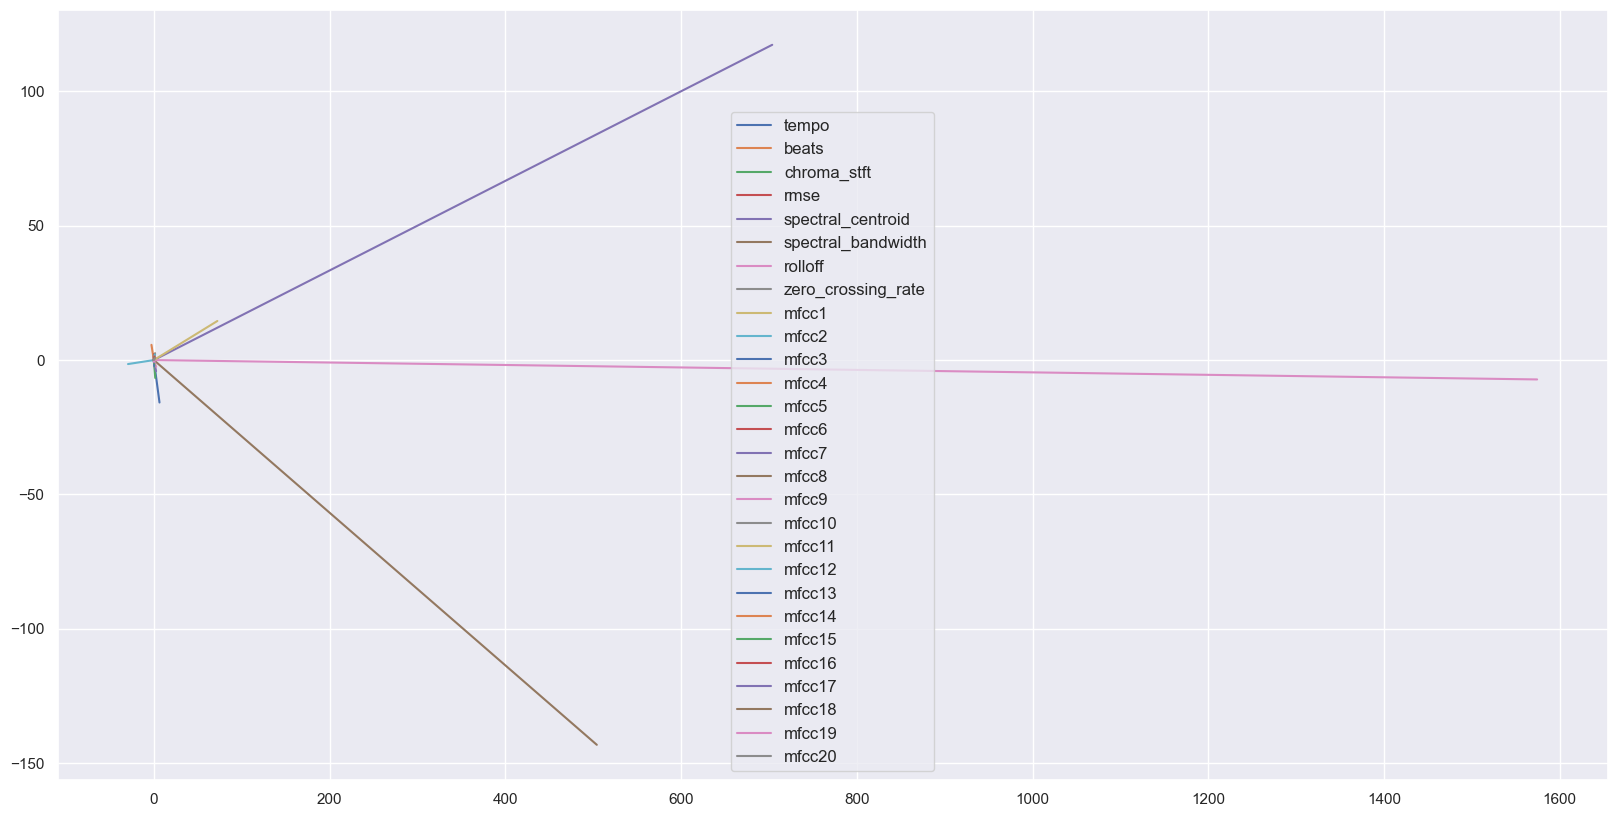

In [93]:
plt.figure(figsize=(20, 10))
for i in range(len(new_coordinates)):
    plt.plot([0, new_coordinates.iloc[i,1]], [0, new_coordinates.iloc[i, 2]])
plt.legend(features, fontsize=12)

## Training and Model Selection

First we import all necessary libraries.

In [94]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost.sklearn import XGBClassifier

In [95]:
# Encode target labels with value between 0 and n_classes-1.
label_encoder = LabelEncoder().fit(y)
name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
name_mapping

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [96]:
# Transform all target values
y = label_encoder.transform(y)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
# We use StratifiedKFold which better prevent overfitting
k_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

scaler = StandardScaler()

# Scale train and Test data
scaler.fit_transform(X_train)
scaler.transform(X_test)

rf_params = { 
    'n_estimators': [ i*10 for i in range(15, 30) ],
    'max_features': ['sqrt'],
    'n_jobs': [-1],
    'random_state': [0]
}

xgb_params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0.01, 0.05, 0.1, 0.2], # L regularization
    'reg_lambda': [0.01, 0.05, 0.1], # L2 regularization
    'booster': ['gbtree'],
    'n_jobs': [-1],
    'random_state': [0]
}

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=k_fold,
                      n_jobs=-1)
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=k_fold,
                       n_jobs=-1)

In [99]:
# Run fit with all sets of parameters
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['sqrt'],
                         'n_estimators': [150, 160, 170, 180, 190, 200, 210,
                                          220, 230, 240, 250, 260, 270, 280,
                                          290],
                         'n_jobs': [-1], 'random_state': [0]})

In [100]:
# Run fit with all sets of parameters
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40), 'n_jobs': [-1],
                         'random_state': [0],
                         'reg_alpha': [0.01, 0.05, 0.1, 0.2],
                         'reg_lambda': [0.01, 0.05, 0.1]})

In [101]:
rf_best_params = rf_grid.best_params_
xgb_best_params = xgb_grid.best_params_

print('RF accuracy: ', rf_grid.score(X_train, y_train))
print('RF params: ', rf_best_params)
print('')
print('XGB accuracy: ', xgb_grid.score(X_train, y_train))
print('XGB params: ', xgb_best_params)

RF accuracy:  0.99875
RF params:  {'max_features': 'sqrt', 'n_estimators': 290, 'n_jobs': -1, 'random_state': 0}

XGB accuracy:  0.99875
XGB params:  {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140, 'n_jobs': -1, 'random_state': 0, 'reg_alpha': 0.1, 'reg_lambda': 0.01}


In [102]:
rf_model = RandomForestClassifier(**rf_best_params)
xgb_model = XGBClassifier(**xgb_best_params)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

print('RF validation accuracy: ', accuracy_score(y_test, rf_pred))
print('RF Classification Report: \n', classification_report(y_test, rf_pred))

print('XGB validation accuracy: ', accuracy_score(y_test, xgb_pred))
print('XGB Classification Report: \n', classification_report(y_test, xgb_pred))

RF validation accuracy:  0.675
RF Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.91      0.91      0.91        11
           2       0.65      0.63      0.64        27
           3       0.57      0.55      0.56        22
           4       0.70      0.61      0.65        23
           5       0.74      0.78      0.76        18
           6       0.90      0.95      0.93        20
           7       0.64      0.75      0.69        24
           8       0.50      0.53      0.52        15
           9       0.55      0.44      0.49        25

    accuracy                           0.68       200
   macro avg       0.68      0.69      0.69       200
weighted avg       0.67      0.68      0.67       200

XGB validation accuracy:  0.655
XGB Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1

## Conclusions

We can see high overfitting; with Training data getting around 99% accuracy, and test data with 68% (for Random Forest). This could be prevented with some additional feature tunning.

Overall, results heavily vary on the music style. Here's the F1 Score results from the RF Classifier:

```
 'blues': 0, --> 0.73
 'classical': 1, --> 0.91
 'country': 2, --> 0.64
 'disco': 3, --> 0.56
 'hiphop': 4, --> 0.65
 'jazz': 5, --> 0.76
 'metal': 6, --> 0.93
 'pop': 7, --> 0.69
 'reggae': 8, --> 0.52
 'rock': 9 --> 0.49
```

We can see far better results with Random Forest, except for reggae, where XGBoost achieves 64% on F1 Score, instead of the 52% from RF. However, some styles achieve good results: Blues, Classical, Jazz, or Metal, which are above 70%.

Even after removing highly correlated features, there's no noticeable increasing results. That being said, it could be worth trying additional models or feature engineering techniques in the future to see if performance can be improved.